# Analyzing and Modeling England Premier League and Italy Serie A Soccer Matches

<div>
<img src=https://media.premiumtimesng.com/wp-content/files/2022/02/Peoples-Gazette.jpeg width="900">
</div>


---

# Introduction

### Project Description

**Goal/Purpose:**

Welcome to this notebook focused on analyzing and modeling soccer matches from the English Premier League and Italian Serie A. Here, we'll dive into the world of football analytics using two datasets that cover the seasons 2022-2023 and 2023-2024 for both leagues.

<p>&nbsp;</p>

**Questions to be Answered:**

Throughout this notebook, we'll explore the following key questions:

**1. Analysis:**

- Performance Analysis:

  - Is there a correlation between a team's rank and its total goals in the season?
  - How do the average goals scored per match differ between the Premier League and Serie A?
  - Which teams had the longest winning streaks in each league?  
  - What is the winning margin for the champions?

- Schedule and Timing:

  - Is there a pattern in the distribution of match days and starting times across the seasons in each league?

- Home Advantage and Venue Analysis:

  - How significant is the home advantage in each league?

- Team Performance Trends:

  - How do teams' current ranks compare to their ranks at the end of the previous season?
  - Are there any noticeable trends in terms of teams' performances throughout the season (e.g., improving, declining)?

- Head-to-Head Analysis:

  - Is there any correlation between the result of the previous match between two teams and the outcome of the current match?

- Impact of Previous Matches:

  - Does the outcome of a team's previous match affect its performance in the following match?
  - Is there any correlation between the time gap since the last match and the team's performance in the current match?

**2. Modeling:**

- Which predictive modeling approach is most effective for forecasting match outcomes in the English Premier League?
- How accurate are the developed predictive models in forecasting match results?
- Which factors contribute most to their predictive ability?

**3. Improvement:**

- What recommendations can we offer to enhance the accuracy and usefulness of our analysis and predictive models?
- How can additional datasets be used to enrich the depth and scope of our analysis?

<p>&nbsp;</p>

### Data Description

**Content:**

Our analysis relies on two main datasets:

- Dataset 1: Contains fixture information for the English Premier League during the seasons 2022-2023 and 2023-2024.

- Dataset 2: Includes fixture information for Italy's Serie A during the seasons 2022-2023 and 2023-2024.

You can access the datasets by clicking [here](https://drive.google.com/drive/folders/17tL-DkV0q9ScRFQhT_8wl9nuXtqXocC_).

<p>&nbsp;</p>

**Description of Attributes:**

| Column  | Description |
| :------ | :---------- |
| Matchweek | The week number of the match within the season |
| Day | The day of the week on which the match was played |
| Date | The date of the soccer match |
| Season | The season year of the match |
| Time | The time at which the match started |
| home_team | The name of the home team |
| home_score | The score achieved by the home team |
| away_team | The name of the away team |
| away_score | The score achieved by the away team |
| Venue | The venue where the match was played |
| Referee | The name of the referee officiating the match |
| diff_score | The difference in goals scored between the home and away teams |

<p>&nbsp;</p>

**Acknowledgements:**

We gratefully acknowledge Sports Marketing Software Services Co., Ltd. for providing the datasets crucial to this analysis. Without their contribution, this research would not have been feasible. We also express our appreciation to the wider community of sports analytics enthusiasts whose insights and contributions continually inspire and shape our work.

Let's begin this journey to uncover the intricacies of soccer analytics and elevate our comprehension of the beautiful game to new levels.

---

# Acquiring and Loading Data

### Importing Libraries and Notebook Setup

In [1]:
%%capture
!pip install skimpy

In [2]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from skimpy import skim, clean_columns

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

np.random.seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Data

We will load two datasets into dataframes:
- `df_epl` for the England Premier League dataset
- `df_ita` for the Italy Serie A dataset.

In [ ]:
# Load DataFrame
epl_path = '/content/drive/MyDrive/Candidate Data/Candidate Data/EPL.xlsx'
ita_path = '/content/drive/MyDrive/Candidate Data/Candidate Data/ITA.xlsx'
df_epl = pd.read_excel(epl_path)
df_ita = pd.read_excel(ita_path)

Let's find out the number of rows and columns in each dataset.

In [ ]:
# Show rows and columns count
print(f"England Premier League:\n- Rows count: {df_epl.shape[0]}\n- Columns count: {df_epl.shape[1]}")
print(f"Italy Serie A:\n- Rows count: {df_ita.shape[0]}\n- Columns count: {df_ita.shape[1]}")

England Premier League:
- Rows count: 663
- Columns count: 12
Italy Serie A:
- Rows count: 670
- Columns count: 12


Given that both datasets share the same format, we merge them into a single dataframe named `df` to simplify future analysis.

In [ ]:
# Concat two dataframe
df_epl['League'] = 'EPL'
df_ita['League'] = 'ITA'
df = pd.concat([df_epl, df_ita])
df.reset_index(inplace = True, drop = True)
print(f'Total rows count: {df.shape[0]}')
print(f'Total columns count: {df.shape[1]}')

Total rows count: 1333
Total columns count: 13


Now that we have all the data consolidated. Before moving on to more advanced steps, let's start by doing some basic exploration of the data to ensure everything is organized correctly.

### Basic Data Exploration

Let's start by exploring the data we have obtained.



In [ ]:
df.head()

,Matchweek,Day,Date,Season,Time,home_team,home_score,away_team,away_score,Venue,Referee,diff_score,League
0,1.000,Fri,2022-08-05,2022-2023,20:00,Crystal Palace,0,Arsenal,2,Selhurst Park,Anthony Taylor,-2,EPL
1,1.000,Sat,2022-08-06,2022-2023,12:30,Fulham,2,Liverpool,2,Craven Cottage,Andy Madley,0,EPL
2,1.000,Sat,2022-08-06,2022-2023,15:00,Tottenham,4,Southampton,1,Tottenham Hotspur Stadium,Andre Marriner,3,EPL
3,1.000,Sat,2022-08-06,2022-2023,15:00,Newcastle United,2,Nottingham Forest,0,St James' Park,Simon Hooper,2,EPL
4,1.000,Sat,2022-08-06,2022-2023,15:00,Leeds United,2,Wolves,1,Elland Road,Robert Jones,1,EPL


#### Check Data Types



Let's check the data types to see if we have any issues.

In [ ]:
# Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Matchweek   1332 non-null   float64       
 1   Day         1333 non-null   object        
 2   Date        1333 non-null   datetime64[ns]
 3   Season      1333 non-null   object        
 4   Time        1333 non-null   object        
 5   home_team   1333 non-null   object        
 6   home_score  1333 non-null   int64         
 7   away_team   1333 non-null   object        
 8   away_score  1333 non-null   int64         
 9   Venue       1333 non-null   object        
 10  Referee     1333 non-null   object        
 11  diff_score  1333 non-null   int64         
 12  League      1333 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 135.5+ KB


It appears that all columns are in the correct format:

- `League`, `Day`, `Season`, `Time`, `home_team`, `away_team`, `Venue` and `Referee` are **strings**.
- `Matchweek` is **floats**.
- `home_score`, `away_score` and `diff_score` are **integers**.
- `Date` is a **datetime**.

#### Check Missing Data

In [ ]:
# Print percentage of missing values
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
Matchweek   0.075
dtype: float64


There are missing values in the `matchweek` column. We'll handle these in the next step during the preprocessing phase.

#### Check for Duplicate Rows

In [ ]:
# Show number of duplicated rows
num_dupicate = df.duplicated().sum()
print(f"No. of entirely duplicated rows: {num_dupicate}")

# Show duplicated rows
if num_dupicate > 0:
  df[df.duplicated()]

No. of entirely duplicated rows: 0


There are no duplicate rows in the dataset, so we don't need to be concerned about that.

#### Check for Unique Values

We'll examine the unique values in each object column to check for any unexpected or misunderstood values.

In [ ]:
# Get unique values of object columns
print('Unique values of object columns of England Premier League dataset')

cols = list(df.select_dtypes(['object']).columns)
unique_values_arr = []
for col in cols:
  unique_values = np.sort(pd.unique(df[df['League'] == 'EPL'][col]))
  unique_values_arr.append({'column_name': col, 'num_unique_values': len(unique_values), 'unique_values': ','.join(unique_values)})

unique_epl_df = pd.DataFrame(unique_values_arr).set_index('column_name')
unique_epl_df

Unique values of object columns of England Premier League dataset


,num_unique_values,unique_values
column_name,,
Day,7,"Fri,Mon,Sat,Sun,Thu,Tue,Wed"
Season,2,"2022-2023,2023-2024"
Time,18,"12:00,12:30,13:00,13:30,14:00,14:15,15:00,15:30,15:45,16..."
home_team,23,"Arsenal,Aston Villa,Bournemouth,Brentford,Brighton,Burnl..."
away_team,23,"Arsenal,Aston Villa,Bournemouth,Brentford,Brighton,Burnl..."
Venue,24,"Anfield,Bramall Lane,Brentford Community Stadium,Craven ..."
Referee,28,"Andre Marriner,Andy Madley,Anthony Taylor,Chris Kavanagh..."
League,1,EPL


In [ ]:
# Get unique values of object columns
print('Unique values of object columns of Italy Serie A dataset')

cols = list(df.select_dtypes(['object']).columns)
unique_values_arr = []
for col in cols:
  unique_values = np.sort(pd.unique(df[df['League'] == 'ITA'][col]))
  unique_values_arr.append({'column_name': col, 'num_unique_values': len(unique_values), 'unique_values': ','.join(unique_values)})

unique_ita_df = pd.DataFrame(unique_values_arr).set_index('column_name')
unique_ita_df

Unique values of object columns of Italy Serie A dataset


,num_unique_values,unique_values
column_name,,
Day,7,"Fri,Mon,Sat,Sun,Thu,Tue,Wed"
Season,2,"2022-2023,2023-2024"
Time,11,"12:30,14:30,15:00,16:30,17:00,18:00,18:30,19:00,20:30,20..."
home_team,23,"Atalanta,Bologna,Cagliari,Cremonese,Empoli,Fiorentina,Fr..."
away_team,23,"Atalanta,Bologna,Cagliari,Cremonese,Empoli,Fiorentina,Fr..."
Venue,21,"Allianz Stadium,Bluenergy Stadium,Dacia Arena,Gewiss Sta..."
Referee,47,"Alberto Santoro,Alessandro Prontera,Andrea Colombo,Anton..."
League,1,ITA


Currently, all values appear to be fine.

#### Check Data Range

In [ ]:
# Print summary statistics
print('Summary statistics of  England Premier League dataset')
df[df['League'] == 'EPL'].describe()

Summary statistics of  England Premier League dataset


,Matchweek,Date,home_score,away_score,diff_score
count,663.000,663,663.000,663.000,663.000
mean,17.436,2023-05-27 12:31:29.592760064,1.688,1.330,0.357
min,1.000,2022-08-05 00:00:00,0.000,0.000,-8.000
25%,9.000,2023-01-01 12:00:00,1.000,0.000,-1.000
50%,17.000,2023-04-30 00:00:00,1.000,1.000,0.000
75%,25.000,2023-11-12 00:00:00,2.000,2.000,2.000
max,38.000,2024-03-17 00:00:00,9.000,8.000,9.000
std,10.169,NaN,1.380,1.236,1.965


In [ ]:
# Print summary statistics
print('Summary statistics of Italy Serie A dataset')
df[df['League'] == 'ITA'].describe()

Summary statistics of Italy Serie A dataset


,Matchweek,Date,home_score,away_score,diff_score
count,669.000,670,670.000,670.000,670.000
mean,17.535,2023-06-02 04:24:21.492537088,1.425,1.160,0.266
min,1.000,2022-08-13 00:00:00,0.000,0.000,-6.000
25%,9.000,2023-01-08 06:00:00,1.000,0.000,-1.000
50%,17.000,2023-05-07 00:00:00,1.000,1.000,0.000
75%,26.000,2023-11-25 00:00:00,2.000,2.000,1.000
max,38.000,2024-03-17 00:00:00,8.000,6.000,7.000
std,10.178,NaN,1.214,1.085,1.707


The data looks good. Each column has its own value and is in the correct format. There are no duplicates, so we don't need to worry about that. We'll deal with the missing values in the next step.

Now, there's one more thing to do: change all the column names to snake case (lowercase with underscores). Also, we'll convert the `season` column to integers by using the starting year of each season. This will make it easier to analyze data across seasons.

After all, we'll try to create some new features which might help us predict match outcomes later in the project.

Let's move on to the next step.

# Data Preprocessing

### Rename Columns

We'll change all the column names to snake case (lowercase with underscores).

In [ ]:
# Rename all columns to snake_case
df = clean_columns(df, case='snake')

In [ ]:
# Verify columns are renamed
df.columns

Index(['matchweek', 'day', 'date', 'season', 'time', 'home_team', 'home_score',
       'away_team', 'away_score', 'venue', 'referee', 'diff_score', 'league'],
      dtype='object')

### Changing Data Types

We'll convert the `season` column to integers by using the starting year of each season. This will make it easier to analyze data across seasons.

In [ ]:
# Setting season to be the start year of a season
df['season'] = df['season'].str.split('-').str[0].astype(int)

In [ ]:
# Verify conversion
assert ptypes.is_numeric_dtype(df['season'])

### Handling Missing Values

Let's display the rows that have missing values in the `matchweek` column.

In [ ]:
# Print out rows in Italian Serie A dataset that have missing values
df[df['matchweek'].isna()]

,matchweek,day,date,season,time,home_team,home_score,away_team,away_score,venue,referee,diff_score,league
1043,NaN,Sun,2023-06-11,2022,20:45,Spezia,1,Hellas Verona,3,Dacia Arena,Daniele Orsato,-2,ITA


We found out that this match is called a "Relegation tie-breaker," so it doesn't have a matchweek. For now, we'll leave it as "NA" and deal with it later when we use this information in our analysis.

### Feature Engineering

Thanks to [Caldass's repo](https://github.com/Caldass/pl-matches-predictor/tree/master), we made more than 35 new features to help us predict the match outcome. Most of these features will be for each team, so we'll use prefixes like `h or ht` for the home team, `d` for a draw, and `a or at` for the away team. If a feature name starts with `_` it means it's made for both home and away teams.

Here are some of the new features we made:

- `winner`: This shows who won the match. It could be the HOME_TEAM, the AWAY_TEAM, or it could be a DRAW.

- `_match_points`: The points a team got in that match.

- `_rank`: The team's rank in the current season.

- `_ls_rank`: The team's rank at the end of the previous season.

- `_days_ls_match`: How many days have passed since the last match.

- `_ls_match_points`: The team's points in the last match.

- `_ls_goals`: The team's total goals in the last match.

- `_points`: The team's total points so far in this season.

- `_l_points`: The team's average points in the last 3 matches.

- `_goals`: The total goals scored by the team in this season.

- `_goals_sf`: The total goals suffered by the team in this season.

- `_l_goals`: The average goals scored by the team in the last 3 matches.

- `_l_goals_sf`: The average goals suffered by the team in the last 3 matches.

- `_l_wavg_points`: The team's weighted average points in the last 3 games.

- `_l_wavg_goals`: The team's weighted average goals in the last 3 games.

- `_l_wavg_goals_sf`: The team's weighted average goals suffered in the last 3 games.

- `_wins`: The number of wins by the team in this season.

- `_draws`: The number of draws by the team in this season.

- `_losses`: The number of losses by the team in this season.

- `_win_streak`: The team's current winning streak.

- `_loss_streak`: The team's current losing streak.

- `_draw_streak`: The team's current drawing streak.

- `ls_winner`: The winner of the last match between both teams.

Let's jump right in.

In [ ]:
# The winner in each match
df['winner'] = np.where(df.home_score > df.away_score, 'HOME_TEAM', np.where(df.away_score > df.home_score, 'AWAY_TEAM', 'DRAW'))

# Home points made in each match
df['h_match_points'] = np.where(df['winner'] == 'HOME_TEAM', 3, np.where(df['winner'] == 'DRAW', 1, 0))

# Away points made in each match
df['a_match_points'] = np.where(df['winner'] == 'AWAY_TEAM', 3, np.where(df['winner'] == 'DRAW', 1, 0))

# A combination of the home team name and the away team name.
# We'll use this to find the match outcome between the two teams in the last season.
df['match_name'] = df.apply(lambda x: x.home_team + ' - ' + x.away_team, axis = 1)

Here, we defined some functions to assist us in calculating the new features.

In [ ]:
# Get current rank of the team
def get_rank(match, team, delta_year):
    full_season_df = df[(df.league == match.league) & (df.season == (match.season - delta_year)) & (df.date < match.date)]

    full_home_df = full_season_df.groupby(['home_team'])[['h_match_points', 'home_score', 'away_score']].sum().reset_index()
    full_home_df.columns = ['team', 'points', 'goals', 'goals_sf']

    full_away_df = full_season_df.groupby(['away_team'])[['a_match_points', 'away_score', 'home_score']].sum().reset_index()
    full_away_df.columns = ['team', 'points', 'goals', 'goals_sf']

    rank_df = pd.concat([full_home_df, full_away_df], ignore_index = True)
    rank_df['goals_df'] = rank_df.goals - rank_df.goals_sf
    rank_df = rank_df.groupby(['team']).sum().reset_index()
    rank_df = rank_df.sort_values(by = ['points', 'goals_df', 'goals'], ascending = False)
    rank_df['rank'] = rank_df.points.rank(method = 'first', ascending = False).astype(int)

    team_rank = rank_df[rank_df.team == team].min()['rank']

    return team_rank

# Get team statistics before each match
def get_match_stats(match, team):
    # When the team is the home team
    home_df = df[(df.league == match.league) & (df.season == match.season) & (df.home_team == team) & (df.date < match.date)]

    # When the team is the away team
    away_df = df[(df.league == match.league) & (df.season == match.season) & (df.away_team == team) & (df.date < match.date)]

    # Points
    home_table = home_df.groupby(['date'])[['h_match_points', 'home_score', 'away_score']].sum().reset_index()
    home_table.columns = ['date', 'points', 'goals', 'goals_sf']
    home_table['goals_df'] = home_table.goals - home_table.goals_sf
    home_table['host'] = 'home'

    away_table = away_df.groupby(['date'])[['a_match_points', 'away_score', 'home_score']].sum().reset_index()
    away_table.columns = ['date', 'points', 'goals', 'goals_sf']
    away_table['goals_df'] = away_table.goals - away_table.goals_sf
    away_table['host'] = 'away'

    full_table = pd.concat([home_table, away_table], ignore_index = True)
    full_table = full_table.sort_values('date', ascending = True)

    # Get streaks
    full_table['start_of_streak'] = full_table.points.ne(full_table.points.shift())
    full_table['streak_id'] = full_table['start_of_streak'].cumsum()
    full_table['streak_counter'] = full_table.groupby('streak_id').cumcount() + 1

    streak_table = full_table[full_table.date == full_table.date.max()]

    if streak_table.points.min() == 3:
        # The team won the previous match
        win_streak = streak_table.streak_counter.sum()
        loss_streak = 0
        draw_streak = 0
    elif streak_table.points.min() == 0:
        # The team lost the previous match
        win_streak = 0
        loss_streak = streak_table.streak_counter.sum()
        draw_streak = 0
    else:
        # The team drew the previous match
        win_streak = 0
        loss_streak = 0
        draw_streak = streak_table.streak_counter.sum()

    # Make exponentially weighted average
    full_table['w_avg_points'] = full_table.points.ewm(span=3, adjust=False).mean()
    full_table['w_avg_goals'] = full_table.goals.ewm(span=3, adjust=False).mean()
    full_table['w_avg_goals_sf'] = full_table.goals_sf.ewm(span=3, adjust=False).mean()

    # Total points stats
    home_points = home_table.points.sum()
    home_goals = home_table.goals.sum()
    home_goals_sf = home_table.goals_sf.sum()
    home_wins = len(home_table[home_table.points == 3])
    home_draws = len(home_table[home_table.points == 1])
    home_losses = len(home_table[home_table.points == 0])

    away_points = away_table.points.sum()
    away_goals = away_table.goals.sum()
    away_goals_sf = away_table.goals_sf.sum()
    away_wins = len(away_table[away_table.points == 3])
    away_draws = len(away_table[away_table.points == 1])
    away_losses = len(away_table[away_table.points == 0])

    total_points = home_points + away_points
    total_goals = home_goals + away_goals
    total_goals_sf = home_goals_sf + away_goals_sf
    total_wins = home_wins + away_wins
    total_draws = home_draws + away_draws
    total_losses = home_losses + away_losses

    # Getting data for a given delta
    full_table_delta = full_table[full_table.date.isin(full_table.date[-3:])]

    home_l_points = full_table_delta[full_table_delta.host == 'home'].points.sum()
    away_l_points = full_table_delta[full_table_delta.host == 'away'].points.sum()

    # Total metric in given delta averaged
    total_l_points = (home_l_points + away_l_points)/3
    total_l_goals = (home_goals + away_goals)/3
    total_l_goals_sf = (home_goals_sf + away_goals)/3

    total_l_w_avg_points = full_table_delta.w_avg_points.sum()
    total_l_w_avg_goals = full_table_delta.w_avg_goals.sum()
    total_l_w_avg_goals_sf = full_table_delta.w_avg_goals_sf.sum()

    return total_points, total_l_points, total_l_w_avg_points, total_goals, total_l_goals, total_l_w_avg_goals, total_goals_sf, total_l_goals_sf, total_l_w_avg_goals_sf, total_wins, total_draws, total_losses, win_streak, loss_streak, draw_streak

# Filter last game of the team and get the date
def get_days_ls_match(match, team):
    last_date = df[(df.league == match.league) & (df.date < match.date) & (df.season == match.season) & (df.match_name.str.contains(team))].date.max()
    days = (match.date - last_date) / np.timedelta64(1,'D')
    return days

# Filter last game and get the team's match point and goal
def get_ls_match_points(match, team):
    last_game = df[(df.league == match.league) & (df.date < match.date) & (df.season == match.season) & (df.match_name.str.contains(team))]
    if len(last_game) == 0:
      return None, None
    elif team == last_game['home_team'].values[0]:
      return last_game['h_match_points'].values[0], last_game['home_score'].values[0]
    elif team == last_game['away_team'].values[0]:
      return last_game['a_match_points'].values[0], last_game['away_score'].values[0]
    else:
      return None, None

# Get the winner of the last match between both teams
def get_ls_winner(match):
    temp_df = df[(df.league == match.league) & (df.date < match.date) & (df.match_name.str.contains(match.home_team)) & (df.match_name.str.contains(match.away_team))]
    temp_df = temp_df[temp_df.date == temp_df.date.max()]

    # Checking if there was a previous match
    if len(temp_df) == 0:
        result = None
    elif temp_df.home_team.values[0] == match.home_team:
        result = temp_df.winner.values[0]
    elif temp_df.away_team.values[0] == match.home_team:
      if temp_df.winner.values[0] == 'HOME_TEAM':
        result = 'AWAY_TEAM'
      elif temp_df.winner.values[0] == 'AWAY_TEAM':
        result = 'HOME_TEAM'
      elif temp_df.winner.values[0] == 'DRAW':
        result = 'DRAW'

    return result

def create_main_cols(match, team):
    # Get current and last delta (years) rank
    team_rank = get_rank(match, team, 0)
    ls_team_rank = get_rank(match, team, 1)

    # Get main match stats
    total_points, total_l_points, total_l_w_avg_points, total_goals, total_l_goals, total_l_w_avg_goals, total_goals_sf, total_l_goals_sf, total_l_w_avg_goals_sf, total_wins, total_draws, total_losses, win_streak, loss_streak, draw_streak = get_match_stats(match, team)

    # Get days since last match
    days = get_days_ls_match(match, team)

    # Get the match points of the last match
    ls_match_points, ls_goals = get_ls_match_points(match, team)

    return team_rank, ls_team_rank, days, ls_match_points, ls_goals, total_points, total_l_points, total_l_w_avg_points, total_goals, total_l_goals, total_l_w_avg_goals, total_goals_sf, total_l_goals_sf, total_l_w_avg_goals_sf, total_wins, total_draws, total_losses, win_streak, loss_streak, draw_streak

Use the above functions to generate new features for both the home team and the away team.

In [ ]:
cols = ['_rank', '_ls_rank', '_days_ls_match',
        '_ls_match_points', '_ls_goals',
        '_points', '_l_points', '_l_wavg_points',
        '_goals', '_l_goals', '_l_wavg_goals',
        '_goals_sf', '_l_goals_sf', '_l_wavg_goals_sf',
        '_wins', '_draws', '_losses',
        '_win_streak', '_loss_streak', '_draw_streak']

ht_cols = ['ht' + col for col in cols]
at_cols = ['at' + col for col in cols]

# Gets main cols for home and away team
df[ht_cols] = pd.DataFrame(
    df.apply(
        lambda x: create_main_cols(x, x.home_team), axis = 1).to_list(), index = df.index)

df[at_cols] = pd.DataFrame(
    df.apply(
        lambda x: create_main_cols(x, x.away_team), axis = 1).to_list(), index = df.index)

In [ ]:
# Result between last game of the teams
df['ls_winner'] = df.apply(lambda x: get_ls_winner(x), axis = 1)

In [ ]:
# Create a combined column for league and season, making it easier for further analysis.
df['league_season'] = df.apply(lambda x: x['league'] + ' - ' + str(x['season']) + '-' + str(x['season'] + 1), axis = 1)

Let's double-check all the new columns to ensure they were created correctly

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   matchweek           1332 non-null   float64       
 1   day                 1333 non-null   object        
 2   date                1333 non-null   datetime64[ns]
 3   season              1333 non-null   int64         
 4   time                1333 non-null   object        
 5   home_team           1333 non-null   object        
 6   home_score          1333 non-null   int64         
 7   away_team           1333 non-null   object        
 8   away_score          1333 non-null   int64         
 9   venue               1333 non-null   object        
 10  referee             1333 non-null   object        
 11  diff_score          1333 non-null   int64         
 12  league              1333 non-null   object        
 13  winner              1333 non-null   object      

Lastly, save the data into an Excel file for future use.

In [ ]:
# Saving data
df.to_excel('feature_df.xlsx', index = False)

---

# Exploratory Data Analysis (EDA)

First, we'll gather the rankings and total number of wins for each team at the end of each season to assist in the exploratory data analysis (EDA).

In [ ]:
# Get team rankings at the end of the season
full_home_df = df.groupby(['league_season', 'league', 'season', 'home_team'])[['h_match_points', 'home_score', 'away_score']].sum().reset_index()
full_home_df.columns = ['league_season', 'league', 'season', 'team', 'points', 'goals', 'goals_sf']

full_away_df = df.groupby(['league_season', 'league', 'season', 'away_team'])[['a_match_points', 'away_score', 'home_score']].sum().reset_index()
full_away_df.columns = ['league_season', 'league', 'season', 'team', 'points', 'goals', 'goals_sf']

rank_df = pd.concat([full_home_df, full_away_df], ignore_index = True)
rank_df['goals_df'] = rank_df.goals - rank_df.goals_sf
rank_df = rank_df.groupby(['league_season', 'league', 'season', 'team']).sum().reset_index()
rank_df = rank_df.sort_values(by = ['league_season', 'league', 'season', 'points', 'goals', 'goals_df'], ascending = False)
rank_df['rank'] = rank_df.groupby(['league_season', 'league', 'season']).points.rank(method = 'first', ascending = False).astype(int)

rank_df.reset_index(inplace=True, drop=True)

In [ ]:
# Get the number of wins for each team at the end of the season
full_home_df = df[df['h_match_points'] == 3].groupby(['league_season', 'league', 'season', 'home_team']).size().reset_index()
full_home_df.columns = ['league_season', 'league', 'season', 'team', 'wins']

full_away_df = df[df['a_match_points'] == 3].groupby(['league_season', 'league', 'season', 'away_team']).size().reset_index()
full_away_df.columns = ['league_season', 'league', 'season', 'team', 'wins']

win_df = pd.concat([full_home_df, full_away_df], ignore_index = True)
win_df = win_df.groupby(['league_season', 'league', 'season', 'team']).sum().reset_index()
win_df = win_df.sort_values(by = ['league_season', 'league', 'season', 'wins'], ascending = False)
win_df.reset_index(inplace = True, drop = True)

# Get the win rate of each team
win_df = pd.merge(win_df, df.groupby(['league_season', 'league', 'season', 'home_team']).size().rename('total_home_match'), left_on = ['league', 'season', 'team'], right_on = ['league', 'season', 'home_team'])
win_df = pd.merge(win_df, df.groupby(['league_season', 'league', 'season', 'away_team']).size().rename('total_away_match'), left_on = ['league', 'season', 'team'], right_on = ['league', 'season', 'away_team'])
win_df['total_match'] = win_df['total_home_match'] + win_df['total_away_match']
win_df['win_rate'] = win_df['wins'] / win_df['total_match']

## General Insights

Based on the information provided above, we can derive some general insights about our dataset as follows:

In [ ]:
def get_general_insights(df):
  h_matches = df[df['winner'] == 'HOME_TEAM']
  a_matches = df[df['winner'] == 'AWAY_TEAM']
  d_matches = df[df['winner'] == 'DRAW']
  summary = {}

  summary['league'] = df.league.max()
  summary['season'] = df.season.max()
  summary['start_date'] = df['date'].min().date()
  summary['end_date'] = df['date'].max().date()
  summary['num_matchweeks'] = df['matchweek'].nunique()
  summary['num_teams'] = len(set(df['home_team'].values) | set(df['away_team'].values))
  summary['num_matches'] = df.shape[0]
  summary['ht_win_matches'] = h_matches.shape[0]
  summary['at_win_matches'] = a_matches.shape[0]
  summary['d_matches'] = d_matches.shape[0]
  summary['best_home_score'] = df['home_score'].max()
  summary['best_away_score'] = df['away_score'].max()

  return summary

In [ ]:
summary_epl_2022 = get_general_insights(df[(df['league'] == 'EPL') & (df['season'] == 2022)])
summary_epl_2023 = get_general_insights(df[(df['league'] == 'EPL') & (df['season'] == 2023)])
summary_ita_2022 = get_general_insights(df[(df['league'] == 'ITA') & (df['season'] == 2022)])
summary_ita_2023 = get_general_insights(df[(df['league'] == 'ITA') & (df['season'] == 2023)])

summary_df = pd.DataFrame([summary_epl_2022, summary_epl_2023, summary_ita_2022, summary_ita_2023])
summary_df

,league,season,start_date,end_date,num_matchweeks,num_teams,num_matches,ht_win_matches,at_win_matches,d_matches,best_home_score,best_away_score
0,EPL,2022,2022-08-05,2023-05-28,38,20,380,184,109,87,9,6
1,EPL,2023,2023-08-11,2024-03-17,29,20,283,130,94,59,6,8
2,ITA,2022,2022-08-13,2023-06-11,38,20,381,161,120,100,8,6
3,ITA,2023,2023-08-19,2024-03-17,29,20,289,127,85,77,7,6


What other insights can we gain from the data through Exploratory Data Analysis (EDA)? Here are some questions to consider:

## Performance Analysis

### Is there a correlation between a team's rank and its total goals in the season?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

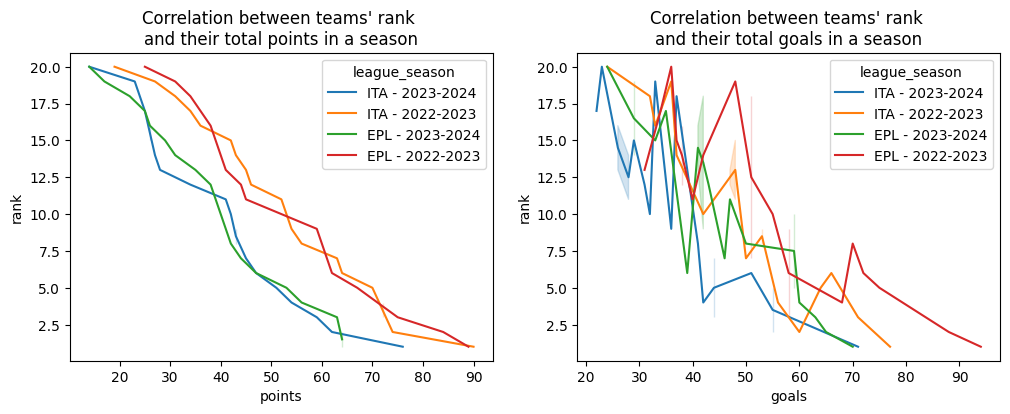

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
sns.lineplot(data = rank_df, x = 'points', y = 'rank', hue = 'league_season')
plt.title('Correlation between teams\' rank \nand their total points in a season')

plt.subplot(122)
sns.lineplot(data = rank_df, x = 'goals', y = 'rank', hue = 'league_season')
plt.title('Correlation between teams\' rank \nand their total goals in a season')
plt.show()

The analysis suggests that there's no clear link between a team's rank and its total goals in a season. Despite scoring more goals, teams sometimes end up with lower ranks compared to others. This indicates that factors beyond goal-scoring, like defensive performance and match outcomes, heavily influence final rankings.

### How do the average goals scored per match differ between the Premier League and Serie A?

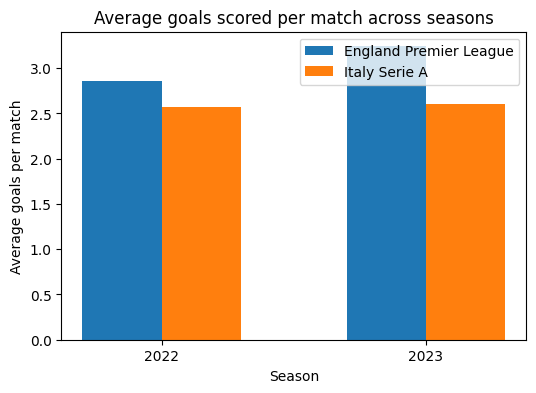

In [ ]:
mean_goals_df = rank_df.groupby(['league', 'season'])['goals'].sum().reset_index()
mean_goals_df.columns = ['league', 'season', 'total_goals']
total_matches_df = df.groupby(['league', 'season']).size().reset_index()
total_matches_df.columns = ['league', 'season', 'total_matches']
mean_goals_df = pd.merge(mean_goals_df, total_matches_df, on = ['league', 'season'])
mean_goals_df['avg_goals'] = mean_goals_df.apply(lambda x: x['total_goals'] / x['total_matches'], axis = 1)
mean_goals_df.sort_values(by = ['season', 'league'], inplace = True)

plt.figure(figsize = (6, 4))
ind = np.arange(2)
width = 0.3
plt.bar(ind, mean_goals_df[mean_goals_df['league'] == 'EPL'].avg_goals, width, label = 'England Premier League')
plt.bar(ind + width, mean_goals_df[mean_goals_df['league'] == 'ITA'].avg_goals, width, label = 'Italy Serie A')
plt.xlabel('Season')
plt.ylabel('Average goals per match')
plt.title('Average goals scored per match across seasons')
plt.xticks(ind + width / 2, mean_goals_df['season'].unique())
plt.legend()
plt.show()


Serie A records a lower average goals per match compared to the Premier League across both seasons, indicating potentially higher competitiveness due to fewer goals scored per match on average.

### Which teams had the longest winning streaks in each league?

In [ ]:
max_ht_win_streak_df = df.iloc[df.groupby(['league', 'season'])['ht_win_streak'].idxmax()][['league', 'season', 'home_team', 'ht_win_streak']]
max_ht_win_streak_df.columns = ['league', 'season', 'team', 'longest_win_streak']
max_at_win_streak_df = df.iloc[df.groupby(['league', 'season'])['at_win_streak'].idxmax()][['league', 'season', 'away_team', 'at_win_streak']]
max_at_win_streak_df.columns = ['league', 'season', 'team', 'longest_win_streak']

max_win_streak_df = pd.concat([max_ht_win_streak_df, max_at_win_streak_df])
max_win_streak_df.reset_index(inplace = True, drop = True)
max_win_streak_df = max_win_streak_df.iloc[max_win_streak_df.groupby(['league', 'season'])['longest_win_streak'].idxmax()]

max_win_streak_df

,league,season,team,longest_win_streak
4,EPL,2022,Manchester City,12
1,EPL,2023,Arsenal,7
6,ITA,2022,Napoli,11
3,ITA,2023,Inter,10


Manchester City and Napoli boasted the longest winning streaks in their leagues during the specified seasons. Manchester City led the English Premier League with 12 consecutive wins in 2022, while Napoli dominated Italy Serie A with an 11-game winning streak in the same year. In subsequent seasons, Arsenal and Inter also showcased impressive performances with 7 and 10-game win streaks, respectively. These streaks underscored the teams' exceptional form and competitive prowess in their respective leagues.

### What is the winning margin for the champions?


To answer that, we need to find all the champions and the second placed teams during the period.

In [ ]:
champions = rank_df[rank_df['rank'] == 1]
champions.reset_index(drop=True, inplace=True)

second_placed = rank_df[rank_df['rank'] == 2]
second_placed.reset_index(drop = True, inplace = True)

We also find all the third placed teams for further analysis.

In [ ]:
third_placed = rank_df[rank_df['rank'] == 3]
third_placed.reset_index(drop = True, inplace = True)

After all, we calculate the winning margin of every champion and add it into the champions dataframe.

In [ ]:
# Calculate the difference in points
winning_margin = champions.points - second_placed.points

# Add the winning margin of every champion as a column in the champions dataframe
champions = champions.assign(winning_margin = winning_margin.values)
champions

,league_season,league,season,team,points,goals,goals_sf,goals_df,rank,winning_margin
0,ITA - 2023-2024,ITA,2023,Inter,76,71,14,57,1,14
1,ITA - 2022-2023,ITA,2022,Napoli,90,77,28,49,1,16
2,EPL - 2023-2024,EPL,2023,Arsenal,64,70,24,46,1,0
3,EPL - 2022-2023,EPL,2022,Manchester City,89,94,33,61,1,5



Inter and Napoli excelled in Italy Serie A, winning the tournament with leads of 14 and 16 points, respectively. In the 2023-2024 England Premier League season, Arsenal won the championship title with a 0 winning margin, indicating they secured the title without a significant points advantage over the runner-up team.

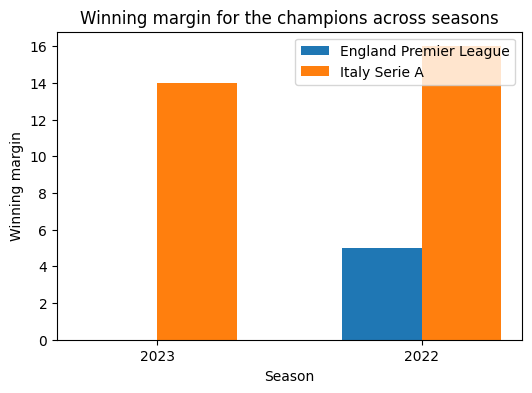

In [ ]:
plt.figure(figsize = (6, 4))
ind = np.arange(2)
width = 0.3
plt.bar(ind, champions[champions['league'] == 'EPL'].winning_margin, width, label = 'England Premier League')
plt.bar(ind + width, champions[champions['league'] == 'ITA'].winning_margin, width, label = 'Italy Serie A')
plt.xlabel('Season')
plt.ylabel('Winning margin')
plt.title('Winning margin for the champions across seasons')
plt.xticks(ind + width / 2, champions['season'].unique())
plt.legend()
plt.show()

The winning margin in Serie A is notably larger than in the Premier League, indicating a potentially greater performance gap between the top teams and the rest of the league in Serie A compared to the Premier League.

## Schedule and Timing

### Is there a pattern in the distribution of match days and starting times across the seasons in each league?

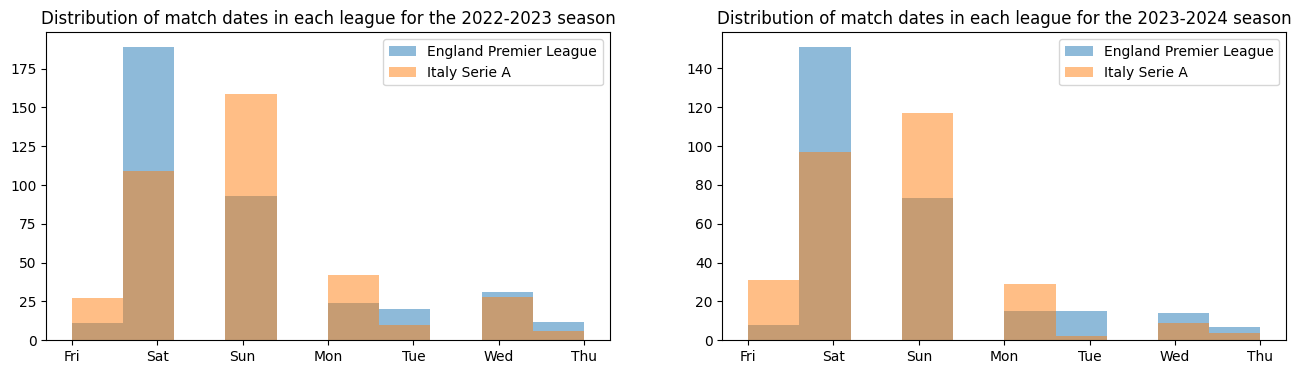

In [ ]:
plt.figure(figsize = (16, 4))

plt.subplot(121)
plt.hist(df[(df['league'] == 'EPL') & (df['season'] == 2022)]['day'], alpha=0.5, label = 'England Premier League')
plt.hist(df[(df['league'] == 'ITA') & (df['season'] == 2022)]['day'], alpha=0.5, label = 'Italy Serie A')
plt.title('Distribution of match dates in each league for the 2022-2023 season')
plt.legend()

plt.subplot(122)
plt.hist(df[(df['league'] == 'EPL') & (df['season'] == 2023)]['day'], alpha=0.5, label = 'England Premier League')
plt.hist(df[(df['league'] == 'ITA') & (df['season'] == 2023)]['day'], alpha=0.5, label = 'Italy Serie A')
plt.title('Distribution of match dates in each league for the 2023-2024 season')
plt.legend()
plt.show()

Most matches occur during the weekend, predominantly on Saturdays in the Premier League and across Saturdays and Sundays in Serie A. The distribution of match days remains consistent across both seasons (2022-2023 and 2023-2024) for both leagues.

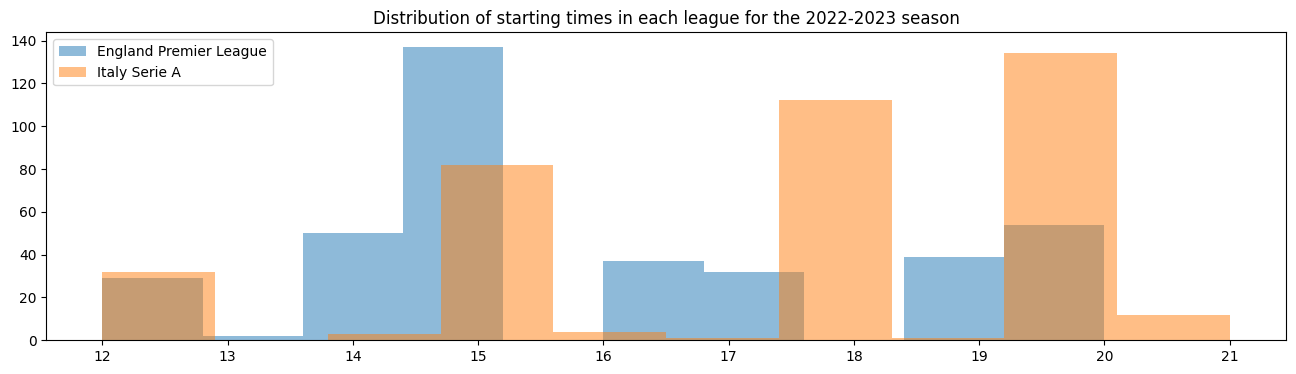

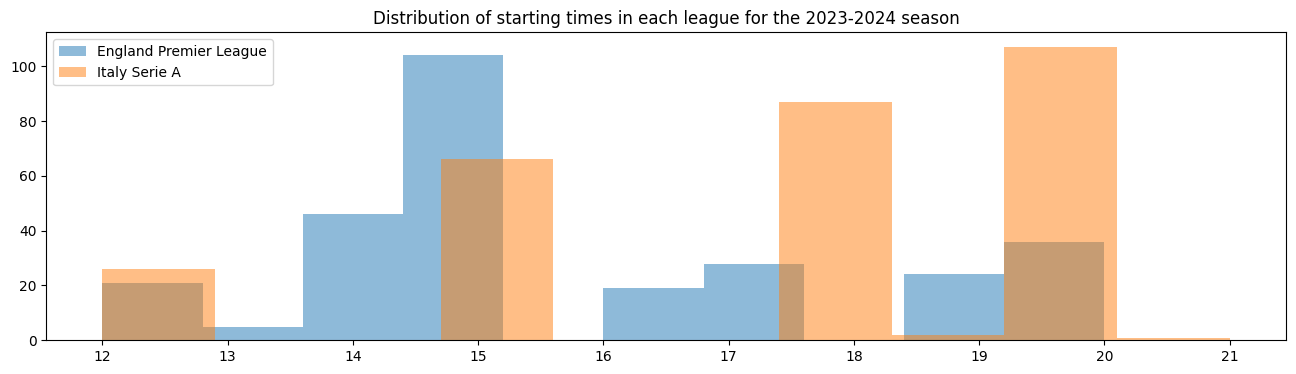

In [ ]:
df['hour'] = df.apply(lambda x: int(x['time'][:2]), axis = 1)

plt.figure(figsize = (16, 4))
plt.hist(df[(df['league'] == 'EPL') & (df['season'] == 2022)]['hour'], alpha=0.5, label = 'England Premier League')
plt.hist(df[(df['league'] == 'ITA') & (df['season'] == 2022)]['hour'], alpha=0.5, label = 'Italy Serie A')
plt.title('Distribution of starting times in each league for the 2022-2023 season')
plt.xticks(np.arange(12, 22))
plt.legend()
plt.show()

plt.figure(figsize = (16, 4))
plt.hist(df[(df['league'] == 'EPL') & (df['season'] == 2023)]['hour'], alpha=0.5, label = 'England Premier League')
plt.hist(df[(df['league'] == 'ITA') & (df['season'] == 2023)]['hour'], alpha=0.5, label = 'Italy Serie A')
plt.title('Distribution of starting times in each league for the 2023-2024 season')
plt.xticks(np.arange(12, 22))
plt.legend()
plt.show()

The distribution of starting times remains consistent across both seasons (2022-2023 and 2023-2024) for both the Premier League and Serie A. However, there is a difference in starting times between the leagues. Premier League matches predominantly start at 2-3pm, whereas Serie A matches typically begin at 6-8pm.

## Home Advantage and Venue Analysis

### How significant is the home advantage in each league?

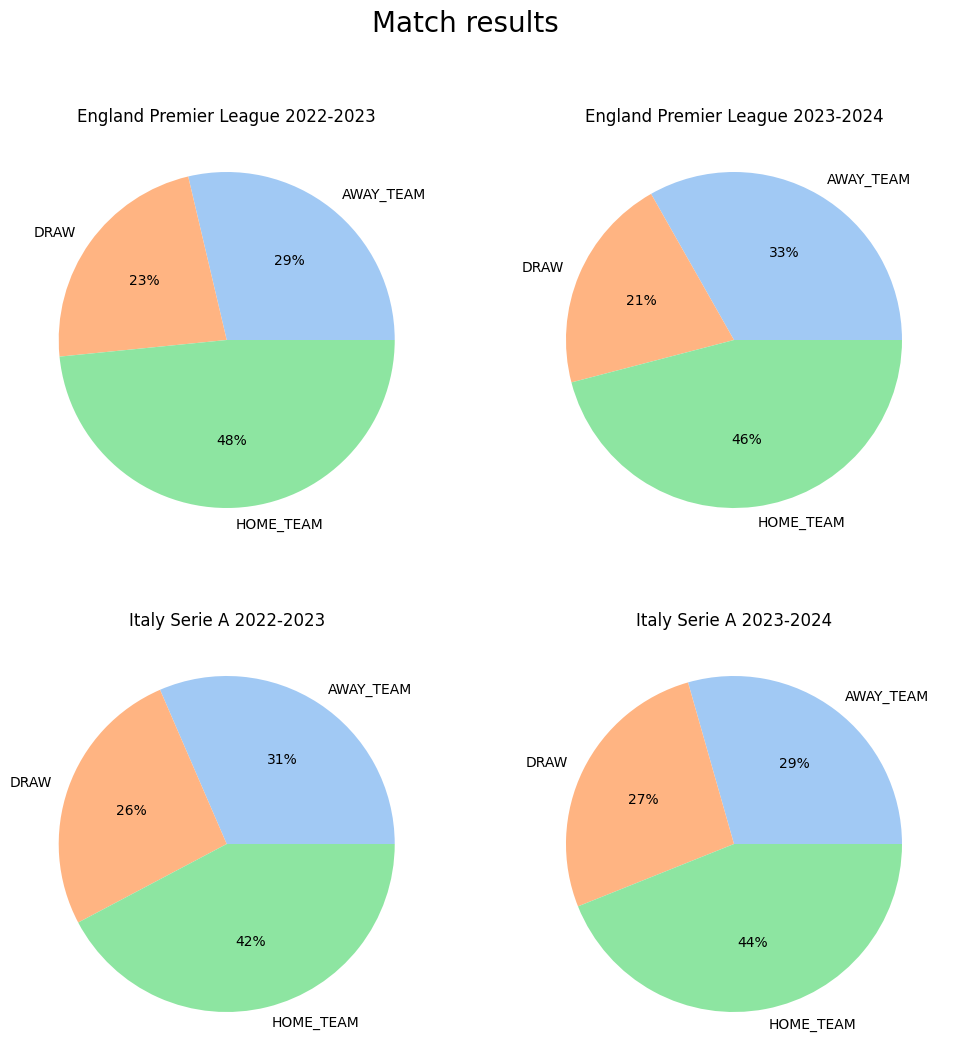

In [ ]:
temp_df = df.groupby(['league_season', 'league', 'season', 'winner']).size().to_frame('num_matches').reset_index()
temp_sum_df = temp_df.groupby(['league_season', 'league', 'season'])['num_matches'].sum().to_frame('total_matches').reset_index()
temp_df = pd.merge(temp_df, temp_sum_df, on = ['league_season', 'league', 'season'])
temp_df['ratio_matches'] = temp_df.apply(lambda x: x['num_matches'] / x['total_matches'], axis = 1)

palette_color = sns.color_palette('pastel')
explode = [0, 0, 0]

fig = plt.figure(figsize = (12, 12))
fig.suptitle('Match results', fontsize = 20)

plt.subplot(221)
plt.pie(temp_df[temp_df['league_season'] == 'EPL - 2022-2023']['ratio_matches'], labels = temp_df['winner'].unique(), colors = palette_color, explode = explode, autopct='%.0f%%')
plt.title('England Premier League 2022-2023')

plt.subplot(222)
plt.pie(temp_df[temp_df['league_season'] == 'EPL - 2023-2024']['ratio_matches'], labels = temp_df['winner'].unique(), colors = palette_color, explode = explode, autopct='%.0f%%')
plt.title('England Premier League 2023-2024')

plt.subplot(223)
plt.pie(temp_df[temp_df['league_season'] == 'ITA - 2022-2023']['ratio_matches'], labels = temp_df['winner'].unique(), colors = palette_color, explode = explode, autopct='%.0f%%')
plt.title('Italy Serie A 2022-2023')

plt.subplot(224)
plt.pie(temp_df[temp_df['league_season'] == 'ITA - 2023-2024']['ratio_matches'], labels = temp_df['winner'].unique(), colors = palette_color, explode = explode, autopct='%.0f%%')
plt.title('Italy Serie A 2023-2024')
plt.show()

The fact that nearly 50% of matches are won by the home team is a common trend in football.

Moreover, with over 70% of the dataframe consisting of winning data, predicting draws will be challenging.

## Team Performance Trends

### How do teams' current ranks compare to their ranks at the end of the previous season?

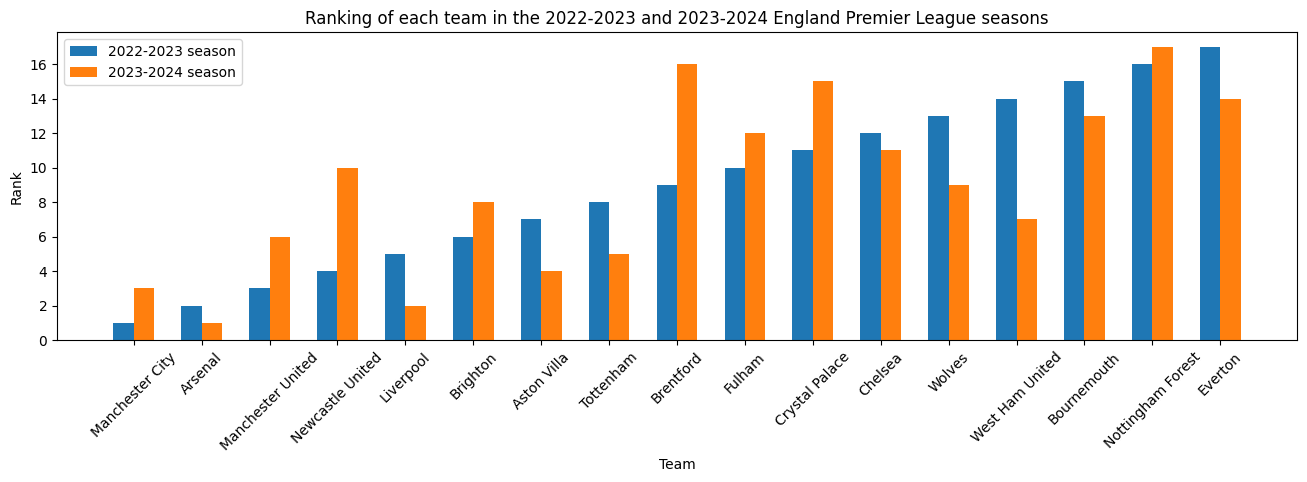

In [ ]:
rank_2022_df = rank_df[rank_df['season'] == 2022][['league', 'team', 'points', 'goals', 'goals_sf', 'rank']]
rank_2023_df = rank_df[rank_df['season'] == 2023][['league', 'team', 'points', 'goals', 'goals_sf', 'rank']]

temp_df = pd.merge(rank_2022_df, rank_2023_df, on = ['league', 'team'], suffixes = ['_2022', '_2023'])

plt.figure(figsize = (16, 4))
ind = np.arange(17)
width = 0.3
plt.bar(ind, temp_df[temp_df['league'] == 'EPL'].rank_2022, width, label = '2022-2023 season')
plt.bar(ind + width, temp_df[temp_df['league'] == 'EPL'].rank_2023, width, label = '2023-2024 season')
plt.xlabel('Team')
plt.ylabel('Rank')
plt.title('Ranking of each team in the 2022-2023 and 2023-2024 England Premier League seasons')
plt.xticks(ind + width / 2, temp_df[temp_df['league'] == 'EPL']['team'].values, rotation = 45)
plt.legend()
plt.show()

Several significant changes in ranks occurred between the two seasons in the Premier League. Some teams notably improved or declined in their rankings from one season to the next. For instance:

- Arsenal improved from 2nd to 1st.
- Liverpool improved from 5th to 2nd.
- Manchester City declined from 1st to 3rd.
- Manchester United declined from 3rd to 6th.
- Newcastle United declined from 4th to 10th.

These changes indicate shifts in performance and competitiveness among teams across the seasons.

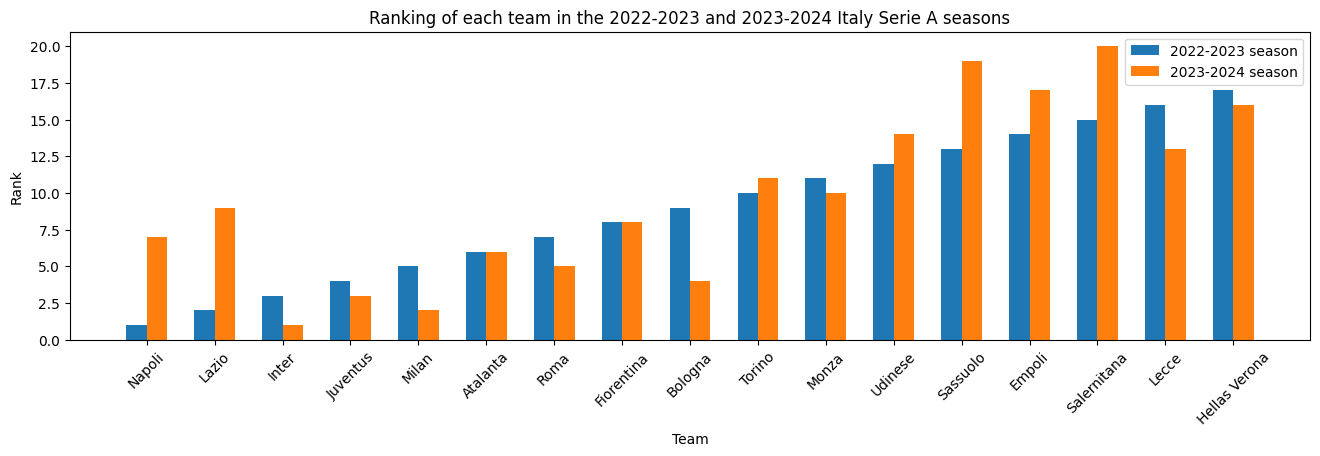

In [ ]:
plt.figure(figsize = (16, 4))
ind = np.arange(17)
width = 0.3
plt.bar(ind, temp_df[temp_df['league'] == 'ITA'].rank_2022, width, label = '2022-2023 season')
plt.bar(ind + width, temp_df[temp_df['league'] == 'ITA'].rank_2023, width, label = '2023-2024 season')
plt.xlabel('Team')
plt.ylabel('Rank')
plt.title('Ranking of each team in the 2022-2023 and 2023-2024 Italy Serie A seasons')
plt.xticks(ind + width / 2, temp_df[temp_df['league'] == 'ITA']['team'].values, rotation = 45)
plt.legend()
plt.show()


There are significant changes in ranks for several teams between the two seasons in Serie A. Some teams experienced notable improvements or declines in their rankings from one season to the next. For example:

- Inter improved from 3rd to 1st.
- Milan declined from 5th to 2nd.
- Napoli declined from 1st to 7th.
- Lazio declined from 2nd to 9th.
- Juventus remained relatively stable, maintaining a rank of 4th in both seasons.

These changes indicate shifts in performance and competitiveness among teams across the seasons.

### Are there any noticeable trends in terms of teams' performances throughout the season?

For simplicity, we'll focus our observation on the top 3 and bottom 3 teams in each season.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

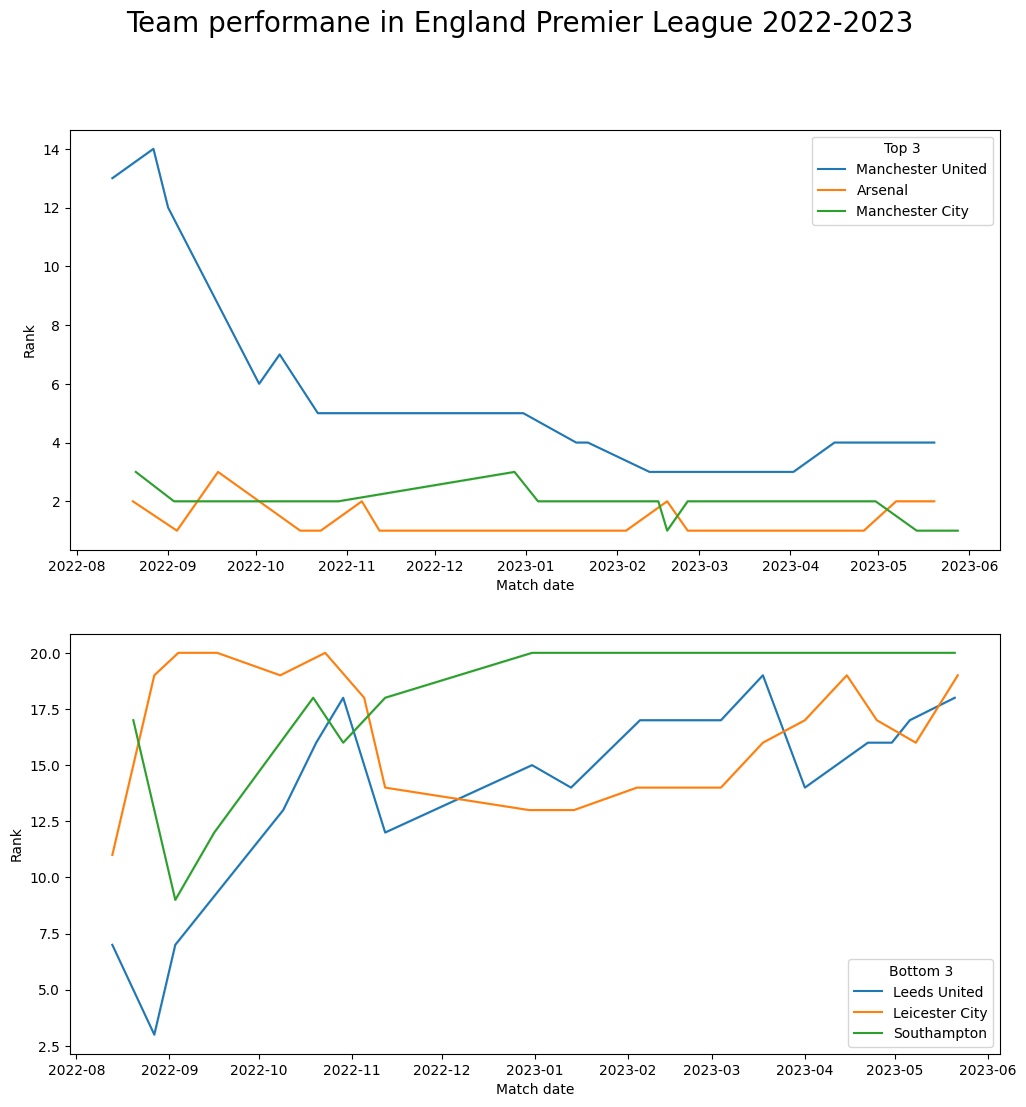

In [ ]:
temp_ht_df = df[df['league_season'] == 'EPL - 2022-2023'][['date', 'home_team', 'ht_rank']].rename(columns = {'home_team': 'team', 'ht_rank': 'rank'})
temp_ht_df = df[df['league_season'] == 'EPL - 2022-2023'][['date', 'away_team', 'at_rank']].rename(columns = {'away_team': 'team', 'at_rank': 'rank'})
temp_df = pd.concat([temp_ht_df, temp_ht_df])
temp_df = temp_df[~temp_df['rank'].isna()]
top_3 = rank_df[rank_df['league_season'] == 'EPL - 2022-2023']['team'].values[:3]
bottom_3 = rank_df[rank_df['league_season'] == 'EPL - 2022-2023']['team'].values[-3:]

fig = plt.figure(figsize = (12, 12))
fig.suptitle('Team performane in England Premier League 2022-2023', fontsize = 20)
plt.subplot(211)
sns.lineplot(data = temp_df[temp_df['team'].isin(top_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Top 3')
plt.xlabel('Match date')
plt.ylabel('Rank')

plt.subplot(212)
sns.lineplot(data = temp_df[temp_df['team'].isin(bottom_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Bottom 3')
plt.xlabel('Match date')
plt.ylabel('Rank')
plt.show()

In the top 3 teams of the England Premier League 2022-2023 season, Arsenal and Manchester City maintained high rankings throughout the season. Manchester United improved from a low rank to secure the third position.

Leeds United, initially ranked relatively high, finished the season in 19th place.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

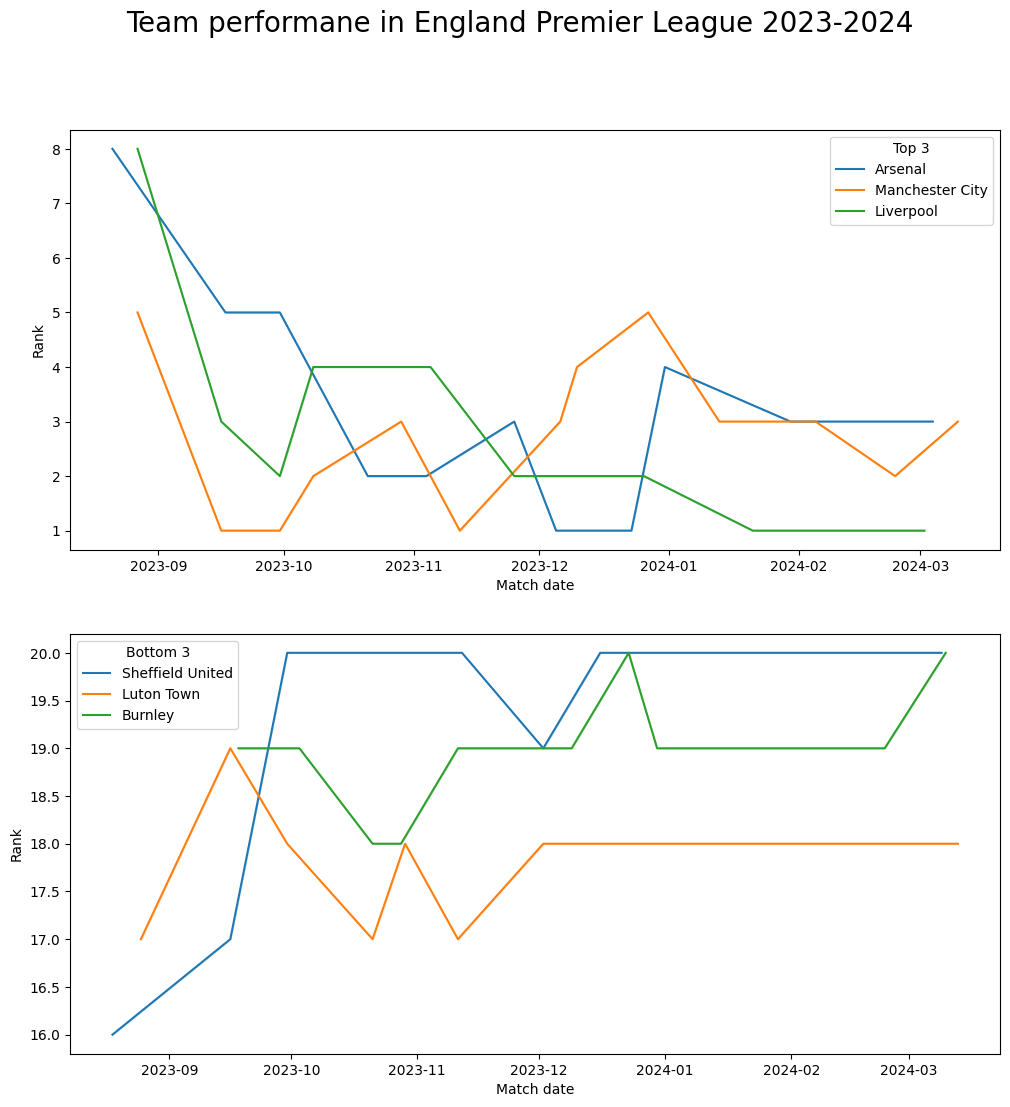

In [ ]:
temp_ht_df = df[df['league_season'] == 'EPL - 2023-2024'][['date', 'home_team', 'ht_rank']].rename(columns = {'home_team': 'team', 'ht_rank': 'rank'})
temp_ht_df = df[df['league_season'] == 'EPL - 2023-2024'][['date', 'away_team', 'at_rank']].rename(columns = {'away_team': 'team', 'at_rank': 'rank'})
temp_df = pd.concat([temp_ht_df, temp_ht_df])
temp_df = temp_df[~temp_df['rank'].isna()]
top_3 = rank_df[rank_df['league_season'] == 'EPL - 2023-2024']['team'].values[:3]
bottom_3 = rank_df[rank_df['league_season'] == 'EPL - 2023-2024']['team'].values[-3:]

fig = plt.figure(figsize = (12, 12))
fig.suptitle('Team performane in England Premier League 2023-2024', fontsize = 20)
plt.subplot(211)
sns.lineplot(data = temp_df[temp_df['team'].isin(top_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Top 3')
plt.xlabel('Match date')
plt.ylabel('Rank')

plt.subplot(212)
sns.lineplot(data = temp_df[temp_df['team'].isin(bottom_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Bottom 3')
plt.xlabel('Match date')
plt.ylabel('Rank')
plt.show()


The ranks seem more consistent in the EPL 2023-2024 season, both at the top and bottom of the table.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

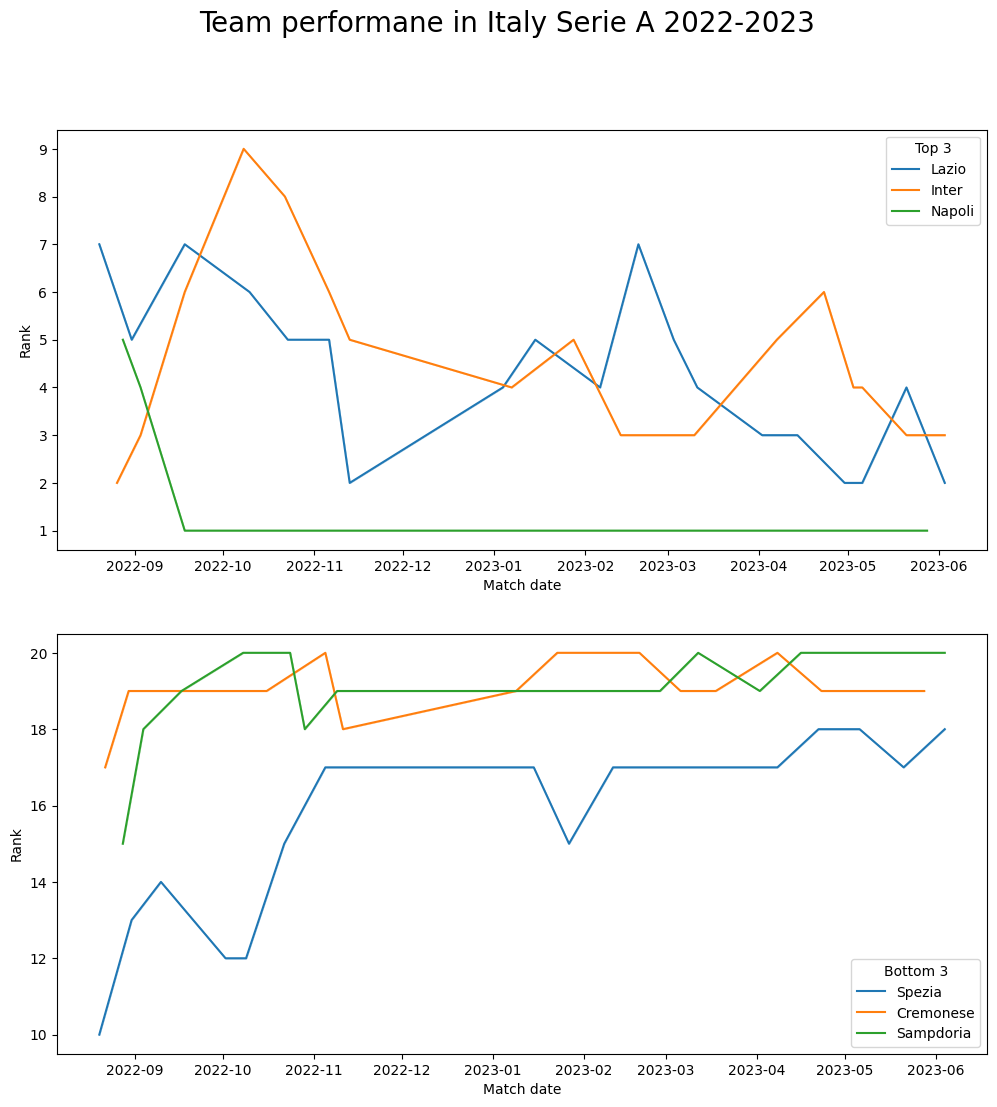

In [ ]:
temp_ht_df = df[df['league_season'] == 'ITA - 2022-2023'][['date', 'home_team', 'ht_rank']].rename(columns = {'home_team': 'team', 'ht_rank': 'rank'})
temp_ht_df = df[df['league_season'] == 'ITA - 2022-2023'][['date', 'away_team', 'at_rank']].rename(columns = {'away_team': 'team', 'at_rank': 'rank'})
temp_df = pd.concat([temp_ht_df, temp_ht_df])
temp_df = temp_df[~temp_df['rank'].isna()]
top_3 = rank_df[rank_df['league_season'] == 'ITA - 2022-2023']['team'].values[:3]
bottom_3 = rank_df[rank_df['league_season'] == 'ITA - 2022-2023']['team'].values[-3:]

fig = plt.figure(figsize = (12, 12))
fig.suptitle('Team performane in Italy Serie A 2022-2023', fontsize = 20)
plt.subplot(211)
sns.lineplot(data = temp_df[temp_df['team'].isin(top_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Top 3')
plt.xlabel('Match date')
plt.ylabel('Rank')

plt.subplot(212)
sns.lineplot(data = temp_df[temp_df['team'].isin(bottom_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Bottom 3')
plt.xlabel('Match date')
plt.ylabel('Rank')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

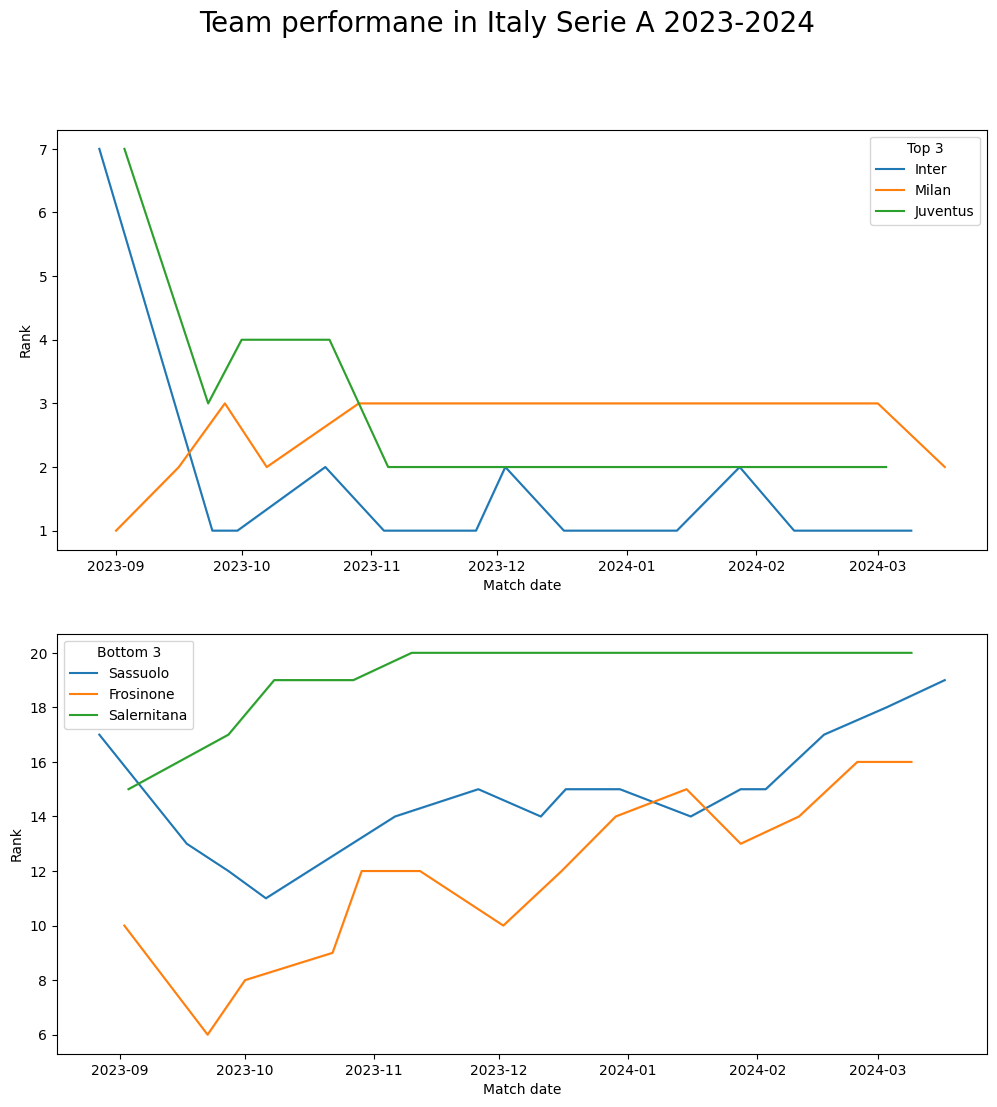

In [ ]:
temp_ht_df = df[df['league_season'] == 'ITA - 2023-2024'][['date', 'home_team', 'ht_rank']].rename(columns = {'home_team': 'team', 'ht_rank': 'rank'})
temp_ht_df = df[df['league_season'] == 'ITA - 2023-2024'][['date', 'away_team', 'at_rank']].rename(columns = {'away_team': 'team', 'at_rank': 'rank'})
temp_df = pd.concat([temp_ht_df, temp_ht_df])
temp_df = temp_df[~temp_df['rank'].isna()]
top_3 = rank_df[rank_df['league_season'] == 'ITA - 2023-2024']['team'].values[:3]
bottom_3 = rank_df[rank_df['league_season'] == 'ITA - 2023-2024']['team'].values[-3:]

fig = plt.figure(figsize = (12, 12))
fig.suptitle('Team performane in Italy Serie A 2023-2024', fontsize = 20)
plt.subplot(211)
sns.lineplot(data = temp_df[temp_df['team'].isin(top_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Top 3')
plt.xlabel('Match date')
plt.ylabel('Rank')

plt.subplot(212)
sns.lineplot(data = temp_df[temp_df['team'].isin(bottom_3)], x = 'date', y = 'rank', hue = 'team')
plt.legend(title = 'Bottom 3')
plt.xlabel('Match date')
plt.ylabel('Rank')
plt.show()

The rankings appear stable in both seasons of Italy Serie A, evident in both the top 3 and bottom 3 teams.

The analysis reveals varying performances among Premier League teams across seasons. Teams like Arsenal and Manchester City consistently performed well, while Manchester United showed improvement. Conversely, Leeds United's performance declined over time. Overall, team rankings remained relatively stable across seasons and leagues, indicating consistent performance trends in football.

## Head-to-Head Analysis

### Is there any correlation between the result of the previous match between two teams and the outcome of the current match?

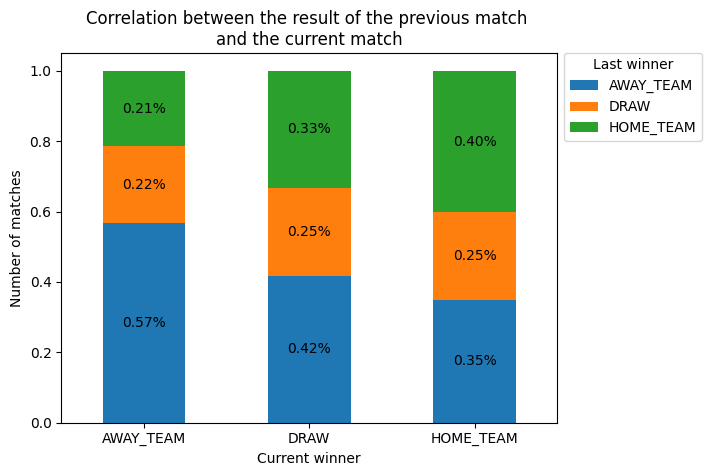

In [ ]:
ax = pd.crosstab(index = df['winner'], columns = df['ls_winner'], normalize = 'index').plot(kind = 'bar', stacked = True, rot = 0)
ax.legend(title = 'Last winner', bbox_to_anchor = (1, 1.02), loc = 'upper left')
for c in ax.containers:
    ax.bar_label(c, label_type = 'center', fmt = '%.2f%%')
plt.xlabel('Current winner')
plt.ylabel('Number of matches')
plt.title('Correlation between the result of the previous match \nand the current match')
plt.show()

The data suggests that the outcome of the previous match between two teams can influence the result of the current match. When the previous match was won by the AWAY_TEAM, there's a higher likelihood of the AWAY_TEAM winning again in the current match. Similarly, when the previous match ended in a DRAW, there's a higher chance of another draw in the current match. Conversely, if the HOME_TEAM won the previous match, there's a higher probability of them winning again in the current match. These insights provide valuable information about potential patterns in match outcomes.

## Impact of Previous Matches

### Does the outcome of a team's previous match affect its performance in the following match?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

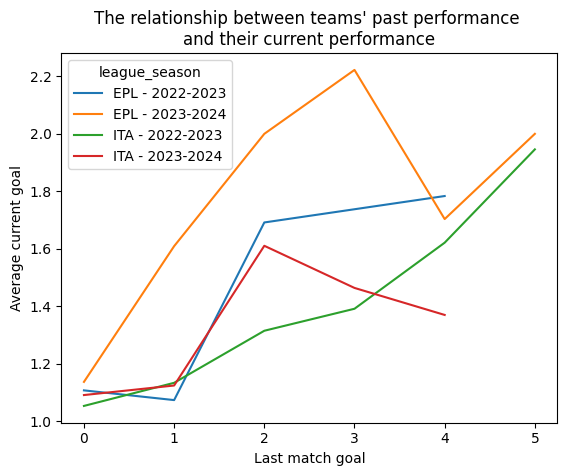

In [ ]:
temp_ht_df = df[['league_season', 'league', 'season', 'home_team', 'home_score', 'ht_ls_goals']].rename(columns = {'home_team': 'team', 'home_score': 'goals', 'ht_ls_goals': 'ls_goals'}).sort_values(by = ['league', 'season', 'team'])
temp_at_df = df[['league_season', 'league', 'season', 'away_team', 'away_score', 'at_ls_goals']].rename(columns = {'away_team': 'team', 'away_score': 'goals', 'at_ls_goals': 'ls_goals'}).sort_values(by = ['league', 'season', 'team'])
temp_df = pd.concat([temp_ht_df, temp_at_df])
temp_df = temp_df.groupby(['league_season', 'league', 'season', 'ls_goals'])['goals'].mean().reset_index()
temp_df.sort_values(by = ['league_season', 'league', 'season', 'ls_goals'])

sns.lineplot(data = temp_df, x = 'ls_goals', y = 'goals', hue = 'league_season')
plt.xlabel('Last match goal')
plt.ylabel('Average current goal')
plt.title('The relationship between teams\' past performance \nand their current performance')
plt.show()

Teams that scored more goals in their previous match tend to continue this trend by scoring more goals in the current match. This indicates a carryover of offensive momentum and underscores the significance of recent performance in shaping match outcomes.

### Is there any correlation between the time gap since the last match and the team's performance in the current match?

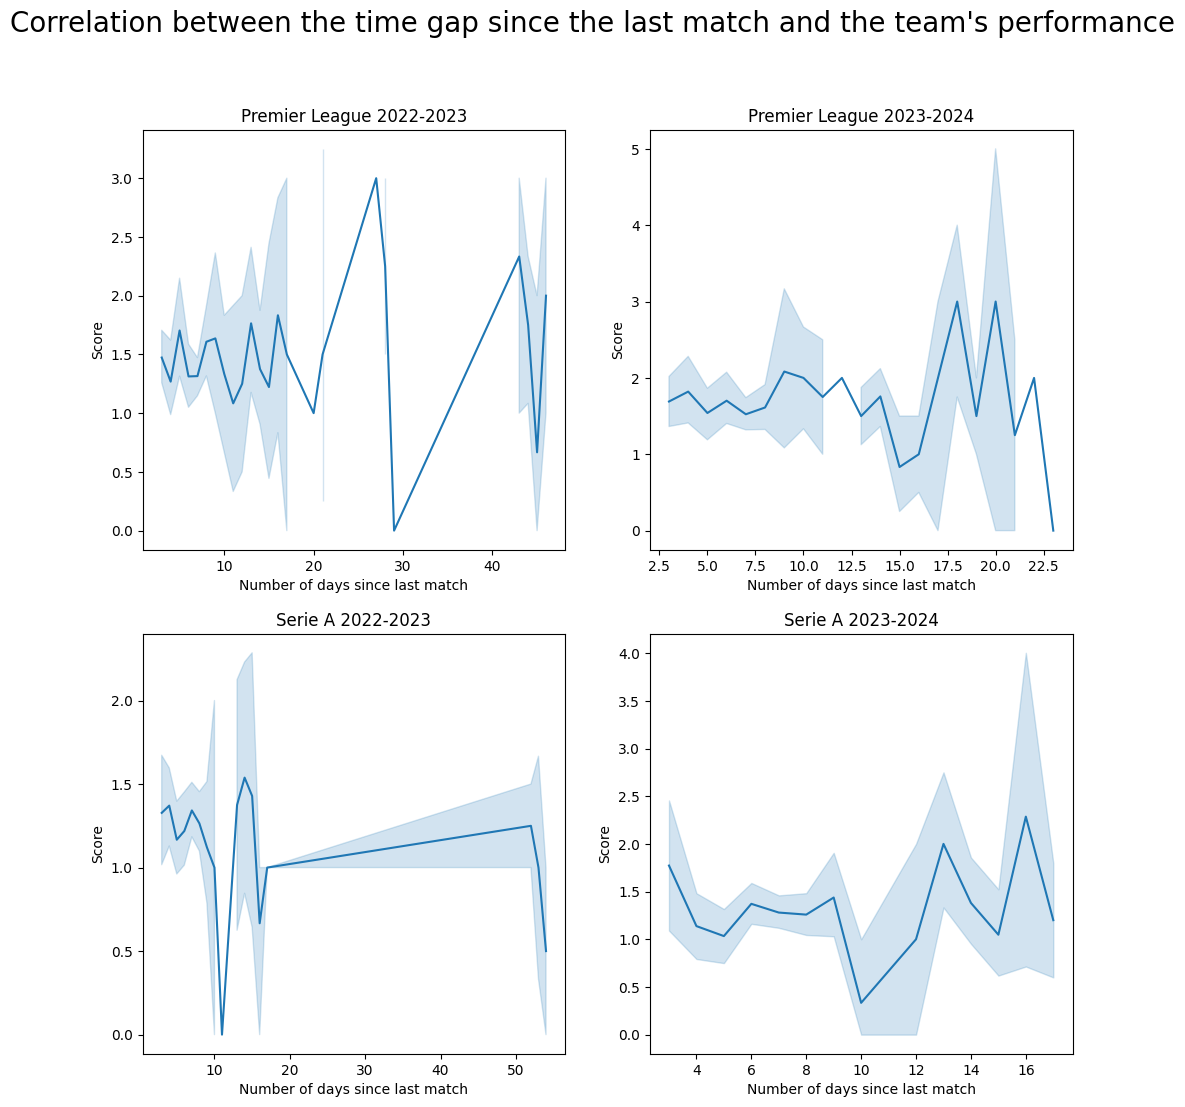

In [ ]:
temp_ht_df = df[['league', 'season', 'ht_days_ls_match', 'home_team', 'home_score']].rename(columns = {'home_team': 'team', 'ht_days_ls_match': 'days_ls_match', 'home_score': 'score'})
temp_at_df = df[['league', 'season', 'at_days_ls_match', 'away_team', 'away_score']].rename(columns = {'away_team': 'team', 'at_days_ls_match': 'days_ls_match', 'away_score': 'score'})
temp_df = pd.concat([temp_ht_df, temp_at_df], axis = 0)
temp_df = temp_df[~temp_df['days_ls_match'].isna()]

fig = plt.figure(figsize = (12, 12))
fig.suptitle('Correlation between the time gap since the last match and the team\'s performance', fontsize = 20)

plt.subplot(221)
sns.lineplot(data = temp_df[(temp_df['league'] == 'EPL') & (temp_df['season'] == 2022)], x = 'days_ls_match', y = 'score')
plt.title('Premier League 2022-2023')
plt.xlabel('Number of days since last match')
plt.ylabel('Score')

plt.subplot(222)
sns.lineplot(data = temp_df[(temp_df['league'] == 'EPL') & (temp_df['season'] == 2023)], x = 'days_ls_match', y = 'score')
plt.title('Premier League 2023-2024')
plt.xlabel('Number of days since last match')
plt.ylabel('Score')

plt.subplot(223)
sns.lineplot(data = temp_df[(temp_df['league'] == 'ITA') & (temp_df['season'] == 2022)], x = 'days_ls_match', y = 'score')
plt.title('Serie A 2022-2023')
plt.xlabel('Number of days since last match')
plt.ylabel('Score')

plt.subplot(224)
sns.lineplot(data = temp_df[(temp_df['league'] == 'ITA') & (temp_df['season'] == 2023)], x = 'days_ls_match', y = 'score')
plt.title('Serie A 2023-2024')
plt.xlabel('Number of days since last match')
plt.ylabel('Score')
plt.show()

In both leagues, teams with longer breaks between matches tend to show greater variability in the number of goals scored in the current match. This suggests that the length of the break may influence the consistency of team performance in terms of goal-scoring.

Moreover, teams with more time since their last match tend to score a higher average number of goals in the current match. This indicates that longer rest periods may contribute to improved physical and tactical preparation, leading to more effective goal-scoring opportunities.

Overall, these observations underscore the potential impact of the time gap between matches on team performance and goal-scoring outcomes across both leagues.

---

# Match Outcome Prediction

## Data Preprocessing

We will choose the England Premier League dataset and develop the best possible model suited to predict match outcomes.

In [ ]:
df_model = df[df['league'] == 'EPL']

We change the target variable into integer.

In [ ]:
df_model['winner'] = np.where(df_model.winner == 'HOME_TEAM', 2, np.where(df_model.winner == 'AWAY_TEAM', 1, 0))

/tmp/ipykernel_5206/757661551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['winner'] = np.where(df_model.winner == 'HOME_TEAM', 2, np.where(df_model.winner == 'AWAY_TEAM', 1, 0))


We will drop columns that contain information not available before the match and some columns that are not needed.

In [ ]:
cols_to_drop = ['league', 'date', 'match_name', 'home_team', 'away_team', 'home_score', 'away_score', 'diff_score', 'h_match_points', 'a_match_points']
df_model = df_model.drop(columns = cols_to_drop, errors = 'ignore')

Then, we fill missing values with -999.

In [ ]:
df_model.fillna(-999, inplace = True)

To be able to import into the model, we need to change the categorical columns to integers.

In [ ]:
df_dum = pd.get_dummies(df_model)

We define target variable `y` as the match result `winner` and feature set `X` as all remaining columns in the processed dataset

In [ ]:
X = df_dum.drop(columns = ['winner'], axis = 1)
y = df_dum.winner.values

Let's observe the shape of the two.

In [ ]:
print(f'X.shape: {X.shape} \ny.shape: {y.shape}')

X.shape: (663, 126) 
y.shape: (663,)


## Train Test Spliting

We will split the data into train and test set with a test size of 20%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Also, we will scale the features using sklearn's `MinMaxScaler`.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

### Model Selection

We will employ the following models for our analysis:

- Logistic Regression
- Support Vector Machine (SVM)
- Random Forests
- k-Nearest Neighbors (KNN)
- Gradient Boosting Methods (XGBoost)

To measure their performance, we'll rely on the accuracy score metric, which evaluates the proportion of correct predictions out of the total predictions made by the model. Since our goal is to predict the exact result, accuracy score serves as an appropriate evaluation measure.

We'll begin by using the default parameters for each model to keep things straightforward.

In [ ]:
models = {
    'LR': LogisticRegression(max_iter = 1000),
    'SVM': SVC(),
    'RF': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGB': xgb.XGBClassifier()
}

We'll assess these models using cross-validation with 5 folds and compare them based on their accuracy scores and the time they take to train.

In [ ]:
# Iterate through each model, printing the accuracy score and the time taken.
scores_dict = {}
for name, model in models.items():
    start = time.time()
    scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 5)
    scores_dict[name] = scores
    print(f'Model: {name}, Average Accuracy: {scores.mean()}, Elapsed time: {time.time() - start} seconds')

Model: LR, Average Accuracy: 0.47924528301886793, Elapsed time: 0.3609433174133301 seconds
Model: SVM, Average Accuracy: 0.5188679245283019, Elapsed time: 0.16396045684814453 seconds
Model: RF, Average Accuracy: 0.49056603773584906, Elapsed time: 1.628838062286377 seconds
Model: KNN, Average Accuracy: 0.39811320754716983, Elapsed time: 0.19570016860961914 seconds
Model: XGB, Average Accuracy: 0.44716981132075473, Elapsed time: 3.7246885299682617 seconds


Observing that SVM achieved the highest accuracy within the shortest time, we decide to proceed with SVM for the upcoming steps.

### Hyperparameter Tuning

We will use `GridSearchCV` to find the best hyperparameters.

In [ ]:
param_grid_svm = {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_svm = GridSearchCV(SVC(), param_grid_svm, scoring = 'accuracy', cv = 5, verbose = 0)
grid_svm.fit(X_train, y_train)

print('Best parameters:', grid_svm.best_params_)

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}


We will fit the model to our training data using the best parameters that were found.

In [ ]:
best_svm = SVC(C = 100, gamma = 0.1, kernel = 'rbf')
best_svm.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

Here, we are using our best model `grid_svm` to make predictions on the test set `X_test`. The predicted values are stored in `y_pred`, which we can later use to compare with the actual target values `y_test` to assess the performance of our model.

In [ ]:
y_pred = best_svm.predict(X_test)

Now, let's calculate the accuracy of the best model on the test set `X_test`.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the best model on the test set:', accuracy)

The accuracy of the best model on the test set: 0.48120300751879697


### Feature Selection

Due to the large number of features (more than 120 in total), we conducted feature selection using the `SelectKBest` method. This method selects features based on the k highest scores between each feature and the target variable.








In [ ]:
# Feature extraction
feat_importances = SelectKBest(score_func=f_classif, k='all').fit(X_train, y_train)

# Feature selection result
feat_importances_result = pd.DataFrame({'feature': X.columns, 'score': feat_importances.scores_})
feat_importances_result = feat_importances_result.sort_values(by = 'score', ascending = False).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 50 116] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


We will attempt to train the model using different subsets of features based on the importance of the features identified earlier.

In [ ]:
acc_list = []

for i in range(5, 50):
  features = feat_importances_result['feature'][:i]

  X = df_dum.drop(columns = ['winner'], axis = 1)
  X = X[features]
  y = df_dum.winner.values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  scaler = MinMaxScaler()

  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  svm = SVC(C = 100, gamma = 0.001, kernel = 'sigmoid')
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  acc_list.append({'i': i, 'accuracy': accuracy})


After training the model with different subsets of features, we'll visualize the results to understand how the number of features impacts the model's performance.

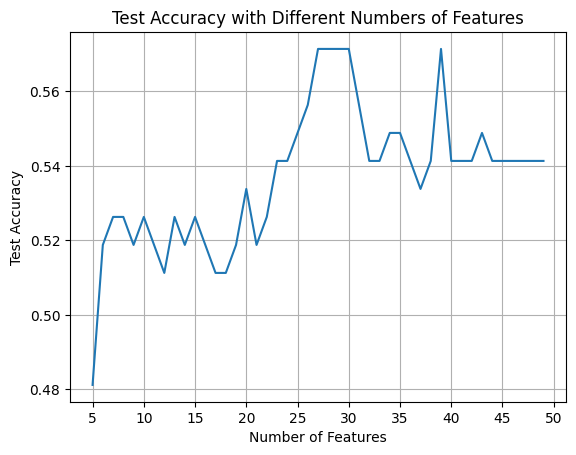

In [ ]:
plt.plot(pd.DataFrame(acc_list).set_index('i'))
plt.title('Test Accuracy with Different Numbers of Features')
plt.xlabel('Number of Features')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(5, 51, 5))
plt.grid(True)
plt.show()

It appears that training the model with the top 27 features yields test accuracy comparable to using all the features, as we did previously. The top 27 features are as follows:


In [ ]:
feat_importances_result[:27]

,feature,score
0,ht_l_wavg_points,16.228
1,ht_l_wavg_goals,15.529
2,ht_l_points,10.019
3,ht_wins,9.186
4,ht_losses,7.710
5,ls_winner_AWAY_TEAM,7.483
6,ht_points,7.471
7,ht_l_goals,6.547
8,ht_goals,6.547
9,venue_Anfield,6.546


### Final Model

We will proceed to retrain the model using only the top 27 important features to obtain the final accuracy.

In [ ]:
features = feat_importances_result['feature'][:27]

X = df_dum.drop(columns = ['winner'], axis = 1)
X = X[features]
y = df_dum.winner.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

final_svm = SVC(C = 100, gamma = 0.001, kernel = 'sigmoid')
final_svm.fit(X_train, y_train)

y_pred = final_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Final test accuracy:', accuracy)

Final test accuracy: 0.5714285714285714


After retraining the model using only the top 27 important features, we achieved a final accuracy of 57%.

# Conclusion

## Data Insights
The EDA provides insights into team performance, goal-scoring trends, league competitiveness, and match outcomes. Highlights include:

- No strong correlation between total goals and final rank.
- Serie A appears more competitive with fewer goals per match.
- Teams like Manchester City, Napoli, Arsenal, and Inter had notable winning streaks.
- Inter and Napoli dominated Serie A, while Arsenal won the Premier League narrowly.
- Both leagues primarily play matches on weekends, with slight variations in schedules.
- Home teams win about half of the matches, making draws harder to predict.
- Significant changes in team rankings occur between seasons.
- Some teams consistently perform well or poorly over time.
- Previous match outcomes correlate with current match probabilities.
- Teams tend to continue goal-scoring trends from previous matches.

## Match Outcome Prediction

Our Football Match Prediction Model can tell who might win a match about 57% of the time. It's not always right, but it gives good guesses.

We picked important information and trained a smart computer program to help us predict match winners. Even though it's not perfect, with a 57% accuracy, it's still helpful.

By using this model, we can make better guesses about who might win future matches. This helps fans, analysts, and people who like to bet on games.

## Possible Next Steps

To improve the accuracy and effectiveness of our analysis and predictive models in soccer matches, it's essential to leverage comprehensive and reliable data sources. Below are the data sources we've found:

**1. FBref**

[FBref](https://fbref.com/en/) is the best source of football analytics as well with the highest level of coverage from their partner Opta for over 20 competitions including the big five mens European leagues, Champions League, World Cup, Copa Libertadores and top leagues in Brazil, Portugal, the Netherlands, United States and Mexico.

We can utilize this [script on GitHub](https://github.com/dataquestio/project-walkthroughs/blob/master/football_matches/scraping.ipynb) or follow this [video tutorial](https://www.youtube.com/watch?v=Nt7WJa2iu0s&t=384s) to scrape data from both the England Premier League and Italy Serie A leagues from FBref. The data will look like this:


In [ ]:
fbref_data_path = '/content/drive/MyDrive/Candidate Data/Candidate Data/fbref.csv'
df_fbref = pd.read_csv(fbref_data_path)
df_fbref.drop(columns = ('Unnamed: 0'), inplace = True)
df_fbref.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.000,1.000,Tottenham,1.900,1.300,64.000,"58,262.000",Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN,18.000,4.000,16.900,1.000,0.000,0.000,2022,Manchester City
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.000,0.000,Norwich City,2.700,0.100,67.000,"51,437.000",İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN,16.000,4.000,17.300,1.000,0.000,0.000,2022,Manchester City
2,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.000,0.000,Arsenal,3.800,0.100,80.000,"52,276.000",İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN,25.000,10.000,14.300,0.000,0.000,0.000,2022,Manchester City
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.000,0.000,Leicester City,2.900,0.800,61.000,"32,087.000",İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN,25.000,8.000,14.000,0.000,0.000,0.000,2022,Manchester City
4,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.000,0.000,Southampton,1.100,0.400,63.000,"52,698.000",Fernandinho,4-3-3,Jonathan Moss,Match Report,NaN,16.000,1.000,15.700,1.000,0.000,0.000,2022,Manchester City


**2. SofaScore**

Live football results page on [SofaScore](https://www.sofascore.com) offers real-time football scores of all live matches that are being played. [SofaScore](https://www.sofascore.com) covers hundreds of soccer leagues, cups and tournaments with live updated results, statistics, league tables, video highlights and fixtures. From most popular football leagues (UEFA Champions League, UEFA Europa League, Premier League, LaLiga, Bundesliga, Serie A, Ligue 1, Brasileiro Série A), top players ratings and statistics to football matches played today, their football live score page covers all the information we need.

We can refer to the instructions outlined in this [Github repository](https://github.com/mckayjohns/youtube-videos/blob/main/code/sofascore%20scraping.ipynb) or watch this [instructional video](https://www.youtube.com/watch?v=EnZRTDuYSes&t=535s) to effectively scrape data from SofaScore. As an example, if we are interested in obtaining data about shot maps, the resulting data may resemble the following format:

In [ ]:
sofascore_data_path = '/content/drive/MyDrive/Candidate Data/Candidate Data/sofascore.xlsx'
df_sofascore = pd.read_excel(sofascore_data_path)
df_sofascore.head()

,player,isHome,shotType,goalType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,blockCoordinates
0,"{'name': 'Erling Haaland', 'firstName': '', 'lastName': ...",True,goal,regular,assisted,"{'x': 13.9, 'y': 50.4, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 51.7, 'z': 3.8}",0.327,0.321,1961580,90,5.000,5671,"{'start': {'x': 50.4, 'y': 13.9}, 'end': {'x': 48.3, 'y'...",1,629,shot,NaN
1,"{'name': 'Rob Holding', 'slug': 'rob-holding', 'shortNam...",False,goal,regular,corner,"{'x': 14.1, 'y': 51.5, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 47.6, 'z': 18.4}",0.075,0.118,1961570,86,NaN,5150,"{'start': {'x': 51.5, 'y': 14.1}, 'end': {'x': 52.4, 'y'...",5,250,shot,NaN
2,"{'name': 'Bukayo Saka', 'firstName': '', 'lastName': '',...",False,miss,NaN,free-kick,"{'x': 22.6, 'y': 70.5, 'z': 0}",left-foot,close-high,"{'x': 0, 'y': 55.3, 'z': 54.2}",0.056,NaN,1961561,80,NaN,4749,"{'start': {'x': 70.5, 'y': 22.6}, 'end': {'x': 44.7, 'y'...",11,651,shot,NaN
3,"{'name': 'İlkay Gündoğan', 'slug': 'ilkay-gundogan', 'sh...",True,miss,NaN,assisted,"{'x': 23.7, 'y': 61.5, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 33.1, 'z': 51.4}",0.042,NaN,1961531,64,NaN,3839,"{'start': {'x': 61.5, 'y': 23.7}, 'end': {'x': 66.9, 'y'...",27,1561,shot,NaN
4,"{'name': 'Rob Holding', 'slug': 'rob-holding', 'shortNam...",False,block,NaN,set-piece,"{'x': 9.5, 'y': 55.5, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 48, 'z': 19}",0.090,NaN,1961514,57,NaN,3401,"{'start': {'x': 55.5, 'y': 9.5}, 'block': {'x': 55.2, 'y...",34,1999,shot,"{'x': 8.8, 'y': 55.2, 'z': 0}"


**3. Transfermarkt**

[Transfermarkt](https://www.transfermarkt.com) is a popular online platform that provides comprehensive football-related information, including player and team statistics, transfer market news, and match reports. It offers detailed player profiles, transfer updates, and market value estimations, making it a go-to resource for football enthusiasts and professionals.

We can follow this guide on [GitHub](https://github.com/mckayjohns/youtube-videos/blob/main/code/scrape_transfermarket.ipynb) or watch this [instructional video](https://www.youtube.com/watch?v=cBVVRQG6eak) to utilize Transfermarkt. For instance, we can access data like market values, which would appear as follows:

In [4]:
transfermarkt_data_path = '/content/drive/MyDrive/Candidate Data/Candidate Data/transfermarkt.xlsx'
df_transfermarkt = pd.read_excel(transfermarkt_data_path)
df_transfermarkt.head()

,x,y,mw,datum_mw,verein,age,wappen
0,1482015600000,200000,€200k,"Dec 18, 2016",Bryne FK,16,https://tmssl.akamaized.net/images/wappen/profil/1057.pn...
1,1513983600000,300000,€300k,"Dec 23, 2017",Molde FK,17,https://tmssl.akamaized.net/images/wappen/profil/687.png...
2,1536530400000,2000000,€2.00m,"Sep 10, 2018",Molde FK,18,NaN
3,1546124400000,5000000,€5.00m,"Dec 30, 2018",Molde FK,18,NaN
4,1559512800000,5000000,€5.00m,"Jun 3, 2019",Red Bull Salzburg,18,https://tmssl.akamaized.net/images/wappen/profil/409_155...


**4. worldfootballR**

[worldfootballR](https://github.com/JaseZiv/worldfootballR) is a package designed to allow users to extract various world football results and player statistics from the following popular football (soccer) data sites:

- [FBref](https://fbref.com/en/)
- [Transfermarkt](https://www.transfermarkt.com)
- [Understat](https://understat.com)

We can utilize the worldfootballR package by following the instructions provided in the [video tutorial](https://www.youtube.com/watch?v=6ZdgEQbn7vo). Additionally, we can explore the available data provided [here](https://github.com/JaseZiv/worldfootballR_data/tree/master).

Here are some additional ideas to enhance the analysis and outcome prediction modeling:

**1. Utilize NLP**

Apply NLP techniques to analyze unstructured text data from various sources like news articles, social media posts, or customer reviews. This can provide insights through sentiment analysis, topic modeling, or entity recognition.

**2. Integrate Geospatial Data**

Incorporate geospatial data to understand location-based patterns and relationships. This includes factors like population density, infrastructure, environmental data, or real-time GPS data.

**3. Explore Player Metrics**

Investigate player-specific metrics such as passing accuracy, successful dribbles, interceptions, or defensive clearances. This detailed player-level analysis offers deeper insights into individual contributions to team performance.

**4. Implement Time Series Analysis**

Apply time series analysis to uncover temporal patterns and trends in match outcomes, team performance, or player statistics. This helps identify seasonality effects, long-term trends, or sudden changes in performance over time.

**5. Consider External Factors**

Take into account external factors like weather conditions, stadium capacity, referee decisions, or team injuries/suspensions. Incorporating these variables can enhance the analysis by considering additional influences on match outcomes.

**6. Experiment with Advanced ML Models**

Explore advanced ML models such as RNNs, LSTMs, or transformer models like BERT. These models can capture complex sequential patterns and dependencies in the data, potentially improving prediction accuracy.

---

# Epilogue

## Versioning
Notebook and insights by Hien Phan.
- Version: 1.0.0
- Date: 2024-03-30